In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


# 1 Импорт данных и библиотек

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from numbers import Number

pd.set_option("display.max_columns", 60)

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c vacanciesru
!unzip vacanciesru.zip

100% 2.97G/2.98G [00:37<00:00, 118MB/s] 
100% 2.98G/2.98G [00:37<00:00, 84.7MB/s]
Archive:  vacanciesru.zip
  inflating: vacancies_2003.csv      
  inflating: vacancies_2004.csv      
  inflating: vacancies_2005.csv      
  inflating: vacancies_2006.csv      
  inflating: vacancies_2007.csv      
  inflating: vacancies_2008.csv      
  inflating: vacancies_2009.csv      
  inflating: vacancies_2010.csv      
  inflating: vacancies_2011.csv      
  inflating: vacancies_2012.csv      
  inflating: vacancies_2013.csv      
  inflating: vacancies_2014.csv      
  inflating: vacancies_2015.csv      
  inflating: vacancies_2016.csv      
  inflating: vacancies_2017.csv      
  inflating: vacancies_2018.csv      
  inflating: vacancies_2019.csv      
  inflating: vacancies_2020.csv      


In [ ]:
datasets = {}
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        file_reg = re.match(r"vacancies_[0-9]{4}.csv", filename)
        year_reg = re.search(r"[0-9]{4}", filename)
        if file_reg:
            datasets[int(year_reg.group())] = os.path.join(dirname, filename)

In [ ]:
def get_df(year, columns=[]):

  if len(columns) == 0:
    return pd.read_csv(datasets[year])
  else:
    return pd.read_csv(datasets[year], usecols=columns)

In [ ]:
def delete_all_dfs(exception_list=[]):

  for name in sorted(globals()):
    if re.search('df_\d{4}', name):
      if len(exception_list) != 0 and name not in exception_list:
        exec(f'del {name}')
        print(f'del {name}')

In [ ]:
def visualize_lineplot(data):

  fig, ax = plt.subplots(figsize=(10, 10))
  sns.lineplot(data=data)
  ax.set_xticks(data.index)

  return plt.show()

# 2 Первый взгляд на данные

In [ ]:
df_2020 = get_df(2020)
df_2020.sample(5)

id                                        description  \
44408   37301579  <p><strong>Твои задачи:</strong></p> <ul> <li>...   
307777  37153395  <p><strong>Требования:</strong></p> <p>Высшее ...   
450146  38678903  <p>Компания Браймонсофт приглашает опытного ba...   
421508  35867367  <p><strong>Должностные обязанности:</strong></...   
421255  35864759  <p><strong>Добрый день, уважаемый кандидат!</s...   

                                               key_skills schedule_id  \
44408   Работа в команде\nРабота с базами данных\nWMS\...       shift   
307777                  разработка нормативных документов    flexible   
450146  Databases\nGit\nMySQL\nJavaScript\nNode.js\nMo...     fullDay   
421508  Делопроизводство\nЗакупки\nПользователь ПК\nГр...     fullDay   
421255  MS Project\nУправление командой\nПланирование\...     fullDay   

         schedule_name  accept_handicapped  accept_kids experience_id  \
44408   Сменный график               False        False  between1And3   
307777   Гибкий график               False        False  between3And6   
450146     Полный день               False        False  between1And3   
421508     Полный день               False        False  between1And3   
421255     Полный день               False        False  between3And6   

           experience_name                                    specializations  \
44408   От 1 года до 3 лет  1.273 Системный администратор 1 Информационные...   
307777       От 3 до 6 лет  1.296 Технический писатель 1 Информационные те...   
450146  От 1 года до 3 лет  1.221 Программирование, Разработка 1 Информаци...   
421508  От 1 года до 3 лет  1.110 Компьютерная безопасность 1 Информационн...   
421255       От 3 до 6 лет  12.92 Информационные технологии 12 Консультиро...   

       contacts billing_type_id billing_type_name  allow_messages  premium  \
44408       NaN        standard          Стандарт            True    False   
307777      NaN        standard          Стандарт            True    False   
450146      NaN        standard          Стандарт            True    False   
421508      NaN        standard          Стандарт            True    False   
421255      NaN        standard          Стандарт            True    False   

       driver_license_types  accept_incomplete_resumes  employer_id  \
44408                   NaN                      False       2180.0   
307777                  NaN                      False      20145.0   
450146                  NaN                      False    4001401.0   
421508                  NaN                      False    3549219.0   
421255                  NaN                      False     744656.0   

                                            employer_name  \
44408                                                Ozon   
307777                                      AT Consulting   
450146                                        Браймонсофт   
421508  ФКУ Центр по обеспечению деятельности Казначей...   
421255                      МЕЧТА, ТМ (Мечта Маркет, ТОО)   

                                 employer_vacancies_url employer_trusted  \
44408      https://api.hh.ru/vacancies?employer_id=2180             True   
307777    https://api.hh.ru/vacancies?employer_id=20145             True   
450146  https://api.hh.ru/vacancies?employer_id=4001401             True   
421508  https://api.hh.ru/vacancies?employer_id=3549219             True   
421255   https://api.hh.ru/vacancies?employer_id=744656             True   

                employer_alternate_url  \
44408      https://hh.ru/employer/2180   
307777    https://hh.ru/employer/20145   
450146  https://hh.ru/employer/4001401   
421508  https://hh.ru/employer/3549219   
421255   https://hh.ru/employer/744656   

                                      employer_industries  \
44408   Курьерская, почтовая доставка\nСкладские услуг...   
307777  Разработка программного обеспечения\nСистемная...   
450146                Разработка программного обеспечения   
42150

In [ ]:
df_2003 = get_df(2003)
df_2003.sample(5)

id                                        description  key_skills  \
1942  17368  Обязанности:\r<br />\nОбеспечение технологичес...         NaN   
1955  17496  Обязательные требования:\r<br />\n1. Уверенное...         NaN   
365    3251  Вакансия открыта в представительстве крупной м...         NaN   
930    8378  Qualifications:\r<br />\nMore than 3 years exp...         NaN   
1430  12310  ЗАО &quot;Компания ТрансТелеКом&quot; приглаша...         NaN   

     schedule_id schedule_name  accept_handicapped  accept_kids experience_id  \
1942     fullDay   Полный день               False        False  between1And3   
1955     fullDay   Полный день               False        False  between1And3   
365      fullDay   Полный день               False        False  between3And6   
930      fullDay   Полный день               False        False  between1And3   
1430     fullDay   Полный день               False        False  between1And3   

         experience_name                                    specializations  \
1942  От 1 года до 3 лет  1.221 Программирование, Разработка 1 Информаци...   
1955  От 1 года до 3 лет  1.221 Программирование, Разработка 1 Информаци...   
365        От 3 до 6 лет  4.332 Управляющий офисом (Оffice manager) 4 Ад...   
930   От 1 года до 3 лет  1.221 Программирование, Разработка 1 Информаци...   
1430  От 1 года до 3 лет  1.273 Системный администратор 1 Информационные...   

      contacts billing_type_id billing_type_name  allow_messages  premium  \
1942       NaN        standard          Стандарт            True    False   
1955       NaN        standard          Стандарт            True    False   
365        NaN        standard          Стандарт            True    False   
930        NaN        standard          Стандарт            True    False   
1430       NaN        standard          Стандарт            True    False   

      driver_license_types  accept_incomplete_resumes  employer_id  \
1942                   NaN                      False       2737.0   
1955                   NaN                      False       4934.0   
365                    NaN                      False       2338.0   
930                    NaN                      False        429.0   
1430                   NaN                      False        402.0   

                employer_name                        employer_vacancies_url  \
1942             АБСОЛЮТ БАНК  https://api.hh.ru/vacancies?employer_id=2737   
1955                   Билайн  https://api.hh.ru/vacancies?employer_id=4934   
365         BAILS Recruitment  https://api.hh.ru/vacancies?employer_id=2338   
930   Samsung Research Center   https://api.hh.ru/vacancies?employer_id=429   
1430    Компания ТрансТелеКом   https://api.hh.ru/vacancies?employer_id=402   

     employer_trusted       employer_alternate_url  \
1942             True  https://hh.ru/employer/2737   
1955             True  https://hh.ru/employer/4934   
365              True  https://hh.ru/employer/2338   
930              True   https://hh.ru/employer/429   
1430             True   https://hh.ru/employer/402   

                                    employer_industries  \
1942                                               Банк   
1955                                    Мобильная связь   
365                                  Кадровые агентства   
930   Разработка программного обеспечения\nСистемная...   
1430  Интернет-провайдер\nСистемная интеграция,  авт...   

      response_letter_required type_id type_name  has_test  response_url  \
1942                     False    open  Открытая     False           NaN   
1955                     False    open  Открытая     False           NaN   
365                      False    open  Открытая     False           NaN   
930                      False    open  Открытая     False           NaN   
1430                     False    open  Открытая     False           NaN   

      test_required  salary_from  salary_to  salary_gross salary_currency  \
1942 

In [ ]:
df_2003.columns == df_2020.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
df_2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1983 non-null   int64  
 1   description                1983 non-null   object 
 2   key_skills                 0 non-null      float64
 3   schedule_id                1983 non-null   object 
 4   schedule_name              1983 non-null   object 
 5   accept_handicapped         1983 non-null   bool   
 6   accept_kids                1983 non-null   bool   
 7   experience_id              1983 non-null   object 
 8   experience_name            1983 non-null   object 
 9   specializations            1983 non-null   object 
 10  contacts                   0 non-null      float64
 11  billing_type_id            1983 non-null   object 
 12  billing_type_name          1983 non-null   object 
 13  allow_messages             1983 non-null   bool 

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 56 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         587637 non-null  int64  
 1   description                587637 non-null  object 
 2   key_skills                 431738 non-null  object 
 3   schedule_id                587637 non-null  object 
 4   schedule_name              587637 non-null  object 
 5   accept_handicapped         587637 non-null  bool   
 6   accept_kids                587637 non-null  bool   
 7   experience_id              587637 non-null  object 
 8   experience_name            587637 non-null  object 
 9   specializations            587637 non-null  object 
 10  contacts                   12130 non-null   object 
 11  billing_type_id            587637 non-null  object 
 12  billing_type_name          587637 non-null  object 
 13  allow_messages             58

In [ ]:
del df_2003
del df_2020

В более ранних датасетах гораздо меньше данных, и больше столбцов без данных. В важной колонке key_skills много пропусков, можно попробовать заменить информацию оттуда из description, specializations или terms_found.

# 3 EDA

## 2.0 Посмотрим на количество записей в датасетах

In [ ]:
def get_num_rows(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['prof_classes_found'])
    num_rows = len(df)

    data = pd.concat([data, pd.DataFrame({'num_vacancy': num_rows}, index=[year])])

  return data


In [ ]:
num_vac = get_num_rows(2003, 2020)
num_vac

num_vacancy
2003         1983
2004         7833
2005        16022
2006        33321
2007        53562
2008        75070
2009        52889
2010        93494
2011       142458
2012       173897
2013       234019
2014       259571
2015       284763
2016       332460
2017       391464
2018       517670
2019       535956
2020       587637

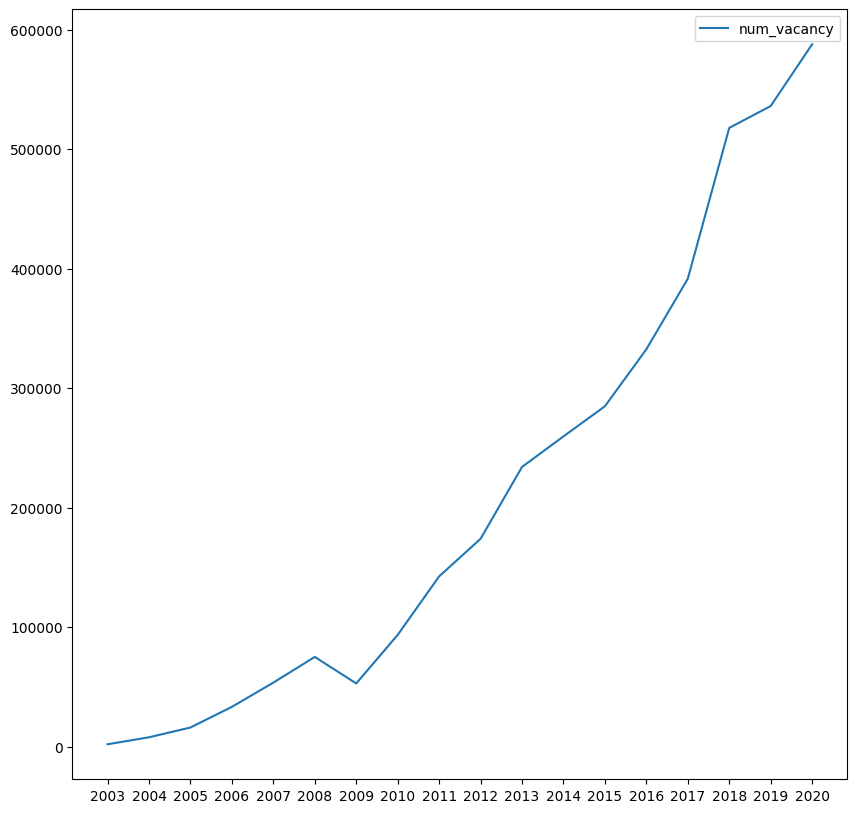

In [ ]:
visualize_lineplot(num_vac)

## 2.1. Популярность топ-10 вакансий по годам

In [ ]:
use_columns = ['description', 'key_skills', 'specializations',
               'name', 'prof_classes_found', 'terms_found']

df = get_df(2020, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   description         587637 non-null  object
 1   key_skills          431738 non-null  object
 2   specializations     587637 non-null  object
 3   name                587637 non-null  object
 4   prof_classes_found  576794 non-null  object
 5   terms_found         583826 non-null  object
dtypes: object(6)
memory usage: 26.9+ MB
None


description  \
76407   <p>Компания<strong> MTC Consulting </strong>на...   
306404  <p>Крупная, динамично развивающаяся компания п...   
315239  <strong>Обязанности:</strong> <p>-монтаж, демо...   
28193   <p>Наша компания ведет информационно-техническ...   
260837  <p><strong>Группа компаний «MAXARD» успешно пр...   

                                               key_skills  \
76407   Ведение переговоров\nПроведение презентаций\nB...   
306404  Работа в команде\nУмение работать в коллективе...   
315239  Системы охранно-тревожной сигнализации\nслабот...   
28193   Windows 7\nРемонт ПК\nНастройка сетевых подклю...   
260837  CRM\nХолодные продажи\nАктивные продажи\nХолод...   

                                          specializations  \
76407   1.270 Сетевые технологии 1 Информационные техн...   
306404  1.221 Программирование, Разработка 1 Информаци...   
315239  1.82 Инженер 1 Информационные технологии, инте...   
28193   1.221 Программирование, Разработка 1 Информаци...   
260837  5.224 Продажа финансовых продуктов 5 Банки, ин...   

                                                     name  \
76407                    Ведущий менеджер по продажам B2B   
306404  Руководитель группы обработки естественного яз...   
315239  Инженер по видеонаблюдению и охранно-пожарной ...   
28193            Программист 1с / Системный администратор   
260837  Менеджер по работе с клиентами/Менеджер по про...   

         prof_classes_found                                        terms_found  
76407             prodajnik  желание_развиваться менеджер_по_продажам team ...  
306404          rukovoditel  pandas catboost python gitlab машинное_обучени...  
315239             engineer                                        опыт_работы  
28193   programmer sysadmin  1c резервное_копирование системный_администрат...  
260837            prodajnik  менеджер_по_продажам team crm желание_работать...

Из выбранных колонок, связанных с профессией, больше всего для этой задачи подходит prof_classes_found, но она содержит много пропусков. Посмотрим на них:

In [ ]:
df[df.prof_classes_found.isna()].sample(10)

description  \
60470   <p><strong>Mars Incorporated</strong> – семейн...   
198034  <p>Газета &quot;Вечерний Карпинск&quot; и сайт...   
188845  <p><strong>Работа мечты</strong></p> <p>Предло...   
472912  <p>Инновационный украинский стар-ап <strong>CI...   
313759  <p>Удержать клиента, обеспечить высокий уровен...   
471913  <p>Spiral Scout is a growing, full-service dig...   
277660  <p><strong>Обязанности:</strong></p> <p>-Выпол...   
415560  <p><strong>Обязанности:</strong></p> <ul> <li>...   
259378  <p>Ищем линкбилдера, который поможет в продвиж...   
249802  <strong>Над чем вы будете работать у нас:</str...   

                                               key_skills  \
60470   Английский язык\nНемецкий язык\nФранцузский яз...   
198034  Internet\nГрамотная речь\nРедактирование\nГрам...   
188845  Английский язык\nОбучение и развитие\nГрамотна...   
472912  Marketing Analysis\nStrategic Marketing\nProdu...   
313759  Прием и распределение звонков\nПрием посетител...   
471913  Leadership Skills\nStrategic Marketing\nАнглий...   
277660  Пользователь ПК\nУмение работать в команде\nПо...   
415560                                                NaN   
259378          SEO\nSEO оптимизация\nПродвижение объекта   
249802  Проведение презентаций\nMS PowerPoint\nОбучени...   

                                          specializations  \
60470   1.172 Начальный уровень, Мало опыта 1 Информац...   
198034  15.96 Искусство, Развлечения, Масс-медиа 15 На...   
188845  1.225 Продажи 1 Информационные технологии, инт...   
472912  3.318 Управление маркетингом 3 Маркетинг, рекл...   
313759  1.211 Поддержка, Helpdesk 1 Информационные тех...   
471913  1.137 Маркетинг 1 Информационные технологии, и...   
277660  29.560 Электромонтер, Кабельщик 29 Рабочий пер...   
415560  1.172 Начальный уровень, Мало опыта 1 Информац...   
259378  1.172 Начальный уровень, Мало опыта 1 Информац...   
249802  6.319 Управление персоналом 6 Управление персо...   

                                                     name prof_classes_found  \
60470                             Service Desk Technician                NaN   
198034  Корреспондент газеты "Вечерний Карпинск" и сай...                NaN   
188845  Организатор продвижения онлайн обучения зарубежом                NaN   
472912                                  Head of Marketing                NaN   
313759                                      Куратор групп                NaN   
471913                            Senior Product Marketer                NaN   
277660                                  Кабельщик-спайщик                NaN   
415560                                  Кабельщик-спайщик                NaN   
259378             Link builder (Polish language, remote)                NaN   
249802  Методолог/РП программ обучения и развития перс...                NaN   

                                              terms_found  
60470   высшее_образование team service_desk конкурент...  
198034                                               site  
188845    удалённая_работа навыки_презентации опыт_работы  
472912  team kpi планирование social_media оплачиваемы...  
313759  внимательность тренер менеджер amocrm деловая_...  
471913  team requirements digital_marketing разработчи...  
277660  полный_рабочий_день среднее_профессиональное о...  
415560  медицинская_страховка официальное_трудоустройс...  
259378  гибкий_график site менторство google_docs опыт...  
249802  высшее_образование тренер team ms_powerpoint н...

Видно, что в пропуски имеют самые разные строчки, с вакансиями из разных сфер, поэтому можно считать, что они случайны, и не учитывать при визуализации.

#### Посмотрим на различные варианты профессиональных классов:

In [ ]:
df.prof_classes_found.unique()

array(['tester', 'programmer', 'operator', 'prodajnik', 'consultant',
       'analyst', 'engineer', 'expert', 'manager', 'support', nan,
       'sysadmin', 'electric', 'sap', 'proj_manager electric',
       'proj_manager it_security', 'devops', 'master', 'it_security',
       'teamlead', 'marketolog', 'sysadmin prodajnik', 'specialist',
       'architector', 'photo_video_prod proj_manager', 'montajnik',
       'analyst it_security', 'nachalnyk', 'designer',
       'support it_security', 'programmer tester',
       'tester rukovoditel teamlead', 'public_writer', 'director',
       'rukovoditel_zam', 'rukovoditel', 'teacher', 'operator naladchik',
       'proj_manager', 'analyst rukovoditel', 'programmer sysadmin',
       'programmer verst', 'programmer prodajnik', 'doc_writer',
       'naladchik', 'verst', 'architector director',
       'rukovoditel nachalnyk', 'prodajnik rukovoditel technic', 'owner',
       'admin', 'support rukovoditel', 'support public_writer',
       'data_scientis

#### Продолжим

Видно, что есть более и менее конкретные профессии. Более конкретные можно было бы относить к менее конкретным, поскольку они в целом подходят по классу.

Сначала найдем топ 10 профессий как есть:


In [ ]:
top_meta_prof = df.prof_classes_found.value_counts()[0:10]
top_meta_prof

programmer      298
prodajnik       203
manager         186
specialist      139
engineer        136
support         119
sysadmin        107
consultant       91
rukovoditel      78
proj_manager     74
Name: prof_classes_found, dtype: int64

Теперь обогатим эти классы. Будем отнесить к ним вакансию, если в описании профессии есть указание на один из 10 мета-классов. Каждая профессия может оносится к нескольким классам.

In [ ]:
for index in df.index:
  found_prof = df.at[index, 'prof_classes_found']
  if found_prof not in top_meta_prof.index and isinstance(found_prof, str):
    for i in range(10):
      meta_prof = top_meta_prof.index[i]
      if re.findall(meta_prof, found_prof):
        top_meta_prof[i] += 1

top_meta_prof

programmer      327
prodajnik       238
manager         190
specialist      139
engineer        136
support         131
sysadmin        116
consultant       91
rukovoditel     107
proj_manager     78
Name: prof_classes_found, dtype: int64

Теперь сделаем то же, но по всем годам:

In [ ]:
def get_top_prof(start_year, finish_year, num_top):

  data = pd.DataFrame()
  all_count_values = Counter()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['prof_classes_found'])
    raw_values_list = list(filter(lambda val: isinstance(val, str), df.prof_classes_found.values))
    values_list = list(map(lambda value: re.split('_| ', value), raw_values_list))
    flat_values_list = list(np.concatenate(np.array(values_list, dtype=object)).flat)
    count_values = Counter(flat_values_list)
    data = pd.concat([data, pd.DataFrame(count_values, index=[year])])
    all_count_values += count_values

  top_prof = dict(all_count_values.most_common(num_top)).keys()

  return data[top_prof]


In [ ]:
top_prof = get_top_prof(2003, 2020, 10)
top_prof

programmer  prodajnik  support  sysadmin  manager  engineer  specialist  \
2003         327        238      131       116      264       136         139   
2004        1402        697      583       589      944       486         552   
2005        3349       1393     1165      1224     1724      1065         886   
2006        8249       2317     2781      3228     2848      2018        1980   
2007       12688       3276     4050      6044     4275      3470        3568   
2008       17536       4931     5813      8475     5920      4983        5025   
2009       12697       6131     4259      4720     3856      2976        3240   
2010       23559       8821     7721      8092     6465      6019        5914   
2011       38210      11384    12834     11361     8992      9302        8912   
2012       46596      14482    14114     14127    11080     11028       11628   
2013       63620      19806    18919     17134    14033     13856       16430   
2014       72273      27429    19221     17807    14037     15316       15072   
2015       84250      35508    17230     15037    15947     13813       13916   
2016       99738      30226    22709     19464    22767     15873       15650   
2017      118204      30893    25622     23857    23626     21234       19195   
2018      144678      36440    33002     31368    29807     26082       24494   
2019      150677      38960    36978     33138    32288     30144       26178   
2020      159854      46501    40657     33217    35058     31247       27144   

      analyst  rukovoditel  tester  
2003       86          109      50  
2004      442          369     220  
2005      842          932     434  
2006     1575         1614    1135  
2007     2700         2858    1557  
2008     3600         3739    2109  
2009     2012         3003    1482  
2010     4007         5156    2737  
2011     6070         7146    4381  
2012     6578         8759    5381  
2013     8080         9481    7294  
2014     9678        11079    8452  
2015    10209        12069   11623  
2016    14144        15267   11676  
2017    18932        17557   13985  
2018    24415        21362   17420  
2019    30700        22559   20549  
2020    38537        25296   24767

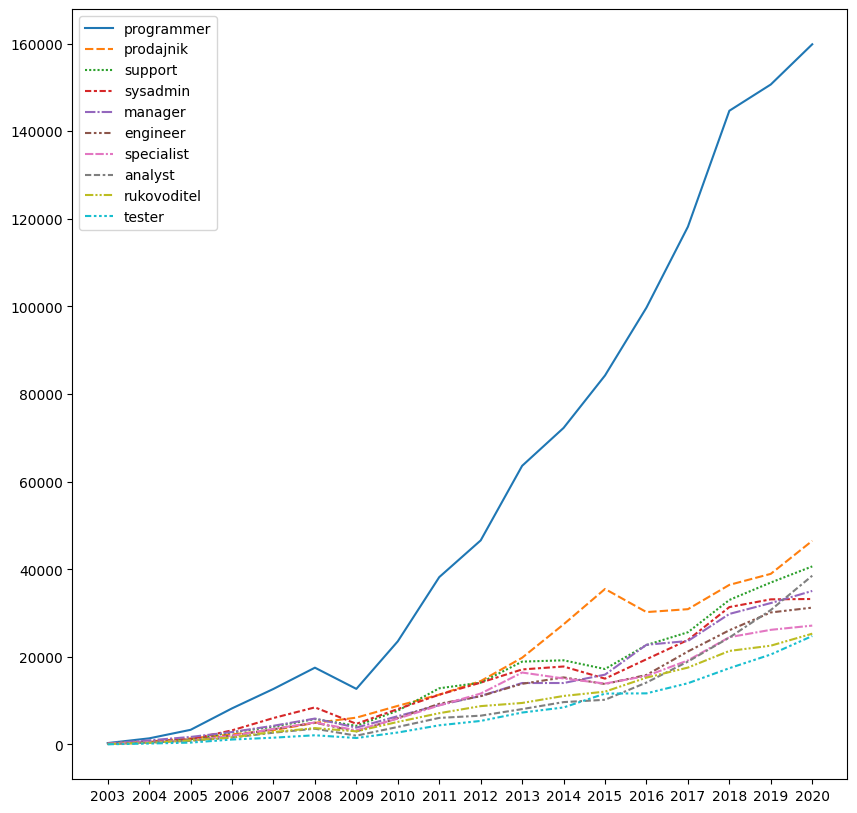

In [ ]:
visualize_lineplot(top_prof)

То же, но без программиста:

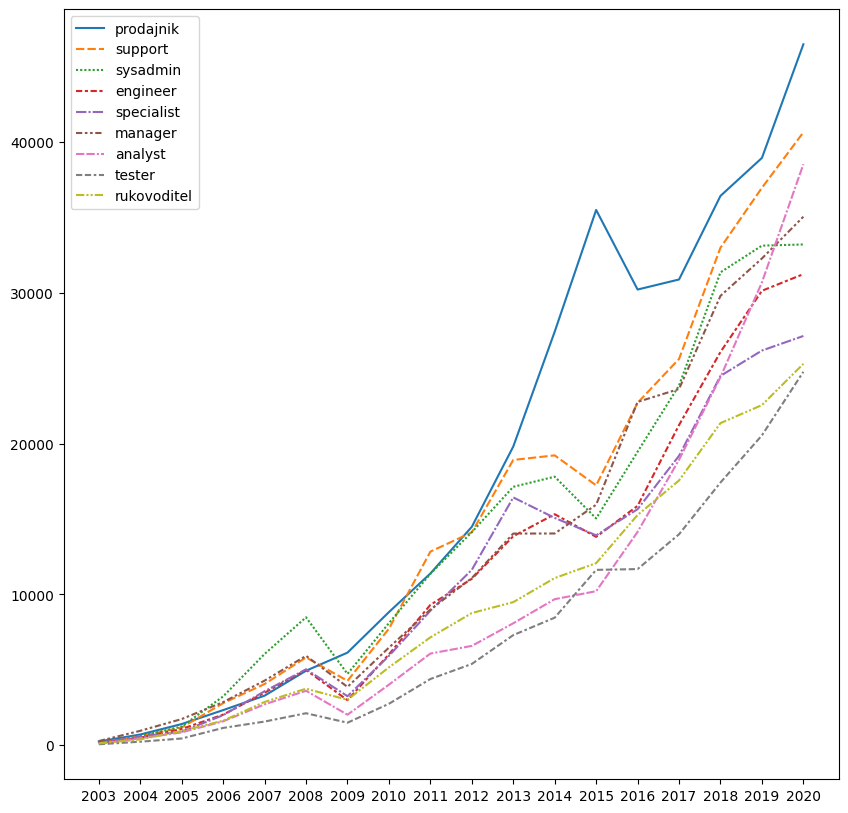

In [ ]:
use_columns = ['prodajnik', 'support', 'sysadmin', 'engineer',
      'specialist', 'manager', 'analyst', 'tester', 'rukovoditel']
visualize_lineplot(top_prof[use_columns])

## 2.2 Популярность топ-20 скилов по годам

In [ ]:
use_columns = ['description', 'key_skills', 'specializations',
               'name', 'prof_classes_found', 'terms_found']

df = get_df(2020, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   description         587637 non-null  object
 1   key_skills          431738 non-null  object
 2   specializations     587637 non-null  object
 3   name                587637 non-null  object
 4   prof_classes_found  576794 non-null  object
 5   terms_found         583826 non-null  object
dtypes: object(6)
memory usage: 26.9+ MB
None


description  \
247334  <p><strong>Премиальная розничная сеть «Миратор...   
145356  <strong>Обязанности:</strong> <ul> <li>выполне...   
293099  <p><strong>Функционал:</strong></p><ul><li>Соп...   
5724    <p><strong>Привет!</strong></p> <p>Мы интернет...   
95553   <p>ЧУ ДО Школа программистов приглашает на раб...   

                                               key_skills  \
247334                                                NaN   
145356  Администрирование серверов Windows\nАдминистри...   
293099                                                NaN   
5724    БЭМ\nvue.js\nwebpack\nJavaScript\nGit\nreact\n...   
95553                                                 NaN   

                                          specializations  \
247334  1.221 Программирование, Разработка 1 Информаци...   
145356  1.273 Системный администратор 1 Информационные...   
293099  1.395 Банковское ПО 1 Информационные технологи...   
5724    1.221 Программирование, Разработка 1 Информаци...   
95553   1.221 Программирование, Разработка 1 Информаци...   

                                                     name prof_classes_found  \
247334                                     Программист 1C         programmer   
145356                              Инженер-системотехник            technic   
293099  Ведущий инженер дежурной смены сопровождения W...            support   
5724                          Middle frontend-разработчик         programmer   
95553                           Проектировщик интерфейсов           designer   

                                              terms_found  
247334  1c кофе kpi youtube английский_язык опыт_работ...  
145356  обеспечение_бесперебойной_работы высшее_образо...  
293099  обеспечение_бесперебойной_работы высшее_образо...  
5724    vue webpack гибкий_график team git middle sass...  
95553   администратор figma css team site разработчик ...

В колонке key_skills много пропусков. Посмотрим на них:

In [ ]:
df[df.key_skills.isna()].sample(10)

description key_skills  \
558491  <p>НСК - ведущая технологическая Компания росс...        NaN   
48376   <p>Компания <strong>Vedita</strong> приглашает...        NaN   
385993  <strong>Задачи:</strong> <ul> <li> <p>Сбор и у...        NaN   
471204  <strong>Обязанности:</strong> <ul> <li>Реализа...        NaN   
110226  <p><strong>Государственное автономное учрежден...        NaN   
277680  <p><strong>Huawei</strong> is a leading provid...        NaN   
436081  <p><em>Мы производим программное обеспечение –...        NaN   
305031  <p><strong>BIKECENTER – </strong>это крупнейша...        NaN   
527210  <p><strong>Обязанности</strong>:</p> <ul> <li>...        NaN   
150250  <p><em><strong>Контакт-центр &quot;Открытая ли...        NaN   

                                          specializations  \
558491  12.97 Исследования рынка 12 Консультирование\n...   
48376   1.221 Программирование, Разработка 1 Информаци...   
385993  1.395 Банковское ПО 1 Информационные технологи...   
471204  1.172 Начальный уровень, Мало опыта 1 Информац...   
110226  1.221 Программирование, Разработка 1 Информаци...   
277680  1.221 Программирование, Разработка 1 Информаци...   
436081  1.221 Программирование, Разработка 1 Информаци...   
305031  1.221 Программирование, Разработка 1 Информаци...   
527210  1.221 Программирование, Разработка 1 Информаци...   
150250  1.172 Начальный уровень, Мало опыта 1 Информац...   

                                                     name prof_classes_found  \
558491            Старший менеджер аналитических проектов            manager   
48376                                        Веб-дизайнер           designer   
385993                                 Системный аналитик            analyst   
471204               Начинающий программист PHP (Laravel)         programmer   
110226                    Начальник отдела web разработки          nachalnyk   
277680  Computer Vision & 3D Algorithm Development Spe...         specialist   
436081                                      IOS Developer         programmer   
305031                                     Программист 1C         programmer   
527210                    Инженер-программист 3 категории         programmer   
150250                   Специалист технической поддержки            support   

                                              terms_found  
558491  комфортный_офис высшее_образование белая_зарпл...  
48376   комфортный_офис кофе figma team site оплачивае...  
385993  team белая_зарплата разработчик activemq форма...  
471204  vue team git laravel php официальное_трудоустр...  
110226  css team github lamp agile php web ux тестиров...  
277680  requirements разработчик artificial_intelligen...  
436081  тренер team баскетбол solid волейбол gamedev г...  
305031  1c техническое_образование team опыт_работы ра...  
527210  белая_зарплата руководство git matlab svn англ...  
150250  l2tp pptp официальное_трудоустройство деловая_...

#### Соответствующие описания вакансий

In [ ]:
df[df.key_skills.isna()].sample(10).description.values

array(['<p><strong>Федеральная сеть «ЕвроОбувь» -</strong> это любимые магазины обуви и аксессуаров европейских производителей.</p> <p><strong>Миссия компании - </strong>Сохранить здоровье жителей страны и донести до каждого Клиента - моду, эстетику и комфорт кожаной обуви и аксессуаров, европейских производителей.</p> <p><strong>В Компанию требуется IT специалист (системный администратор)</strong> в городе Ессентуки ул. Гоголя, 89 График работы магазина: с 09-00 до 18-00 (5/2 выходные суббота и воскресенье)</p> <p><strong>Если Вы активны, позитивны, готовы к новым знаниям - мы ждем именно Вас!<br />Откликайтесь - рассматриваем все анкеты!</strong></p> <p><strong>Обязанности:</strong><br />- Техническая поддержка посредством удаленного доступа;</p> <p>- Внедрение новых сервисов и служб в инфраструктуру Компании, а также их поддержка;</p> <p>- Обеспечение информационной безопасности: антивирусная защита, резервное копирование данных;</p> <p>- Установка и замена аппаратного и программног

#### Соответствующие terms_found

In [ ]:
df[df.key_skills.isna()].sample(10).terms_found.values

array(['1c техническая_документация официальное_трудоустройство опыт_работы наставник поддержка разработка',
       'медицинская_страховка среднее_профессиональное опыт_работы',
       'team официальное_трудоустройство компенсация_мобильной_связи опыт_работы наставник',
       'обеспечение_бесперебойной_работы высшее_образование системный_администратор gps опыт_работы сервер',
       '1c техническое_образование администратор centos системный_администратор team мониторинг rdp active_directory ms_office ubiquiti опыт_работы отчётность wi-fi hp поддержка разработка dell',
       'современный_офис распределение_задач f2p гибкий_график дружный_коллектив разработчик agile английский_язык деловая_переписка jira опыт_работы intermediate полный_рабочий_день разработка управление',
       'менеджер_по_продажам skype ms_excel ms_office официальное_трудоустройство ms_word опыт_работы e-mail медицинская_страховка удалённая_работа грамотная_речь',
       'системное_мышление basic высшее_образование 

#### Продолжим:

Видно, что пропуски случайны, можно их опустить.

In [ ]:
def get_top_key_skills(start_year, finish_year, num_top):

  data = pd.DataFrame()
  all_count_values = Counter()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['key_skills'])
    raw_values_list = list(filter(lambda val: isinstance(val, str), df.key_skills.values))
    values_list = list(map(lambda value: re.split('\n', value), raw_values_list))
    try:
      flat_values_list = list(np.concatenate(np.array(values_list, dtype=object)).flat)
      count_values = Counter(flat_values_list)
      data = pd.concat([data, pd.DataFrame(count_values, index=[year])])
      all_count_values += count_values
    except Exception:
      continue
  top_key_skills = dict(all_count_values.most_common(num_top)).keys()

  return data[top_key_skills]

In [ ]:
top_key_skills = get_top_key_skills(2003, 2020, 20)
top_key_skills

JavaScript    SQL    Git   HTML  Работа в команде  Английский язык  \
2015        6702   2148   2528   3791              1563             1732   
2016       13481   6567   8450   9790              7109             4961   
2017       20170   9936  12584  14485              8173             6897   
2018       28103  16130  19460  20174             13214            10910   
2019       31635  25629  25126  22114             20011            19672   
2020       39834  54686  43739  27023             37161            41492   

        CSS  Пользователь ПК  Linux    PHP   Java  Управление проектами  \
2015   3015             1496   1683   2765   2312                  1977   
2016   8136             6727   5011   8995   6431                  6358   
2017  12672             7210   7952  12682   8414                  8723   
2018  17615            11593  12440  17147  12965                 13631   
2019  19579            18709  18152  17461  17120                 17962   
2020  24501            36002  35131  20224  29512                 26611   

      Ведение переговоров  MySQL  Грамотная речь  Python  Активные продажи  \
2015                 2434   2430            1284     787              1613   
2016                 8407   7591            5500    3232              5051   
2017                10196  11175            6287    4731              6871   
2018                15266  15693            9865    9245             10246   
2019                18092  16144           15902   14710             12489   
2020                20273  21579           32237   26927             22045   

        ООП  HTML5  jQuery  
2015   5146   5003    5121  
2016   6024   6756    7684  
2017   7917   8939    9708  
2018   9799  11423   11319  
2019  11553  10935   10400  
2020  17116  12535   11096

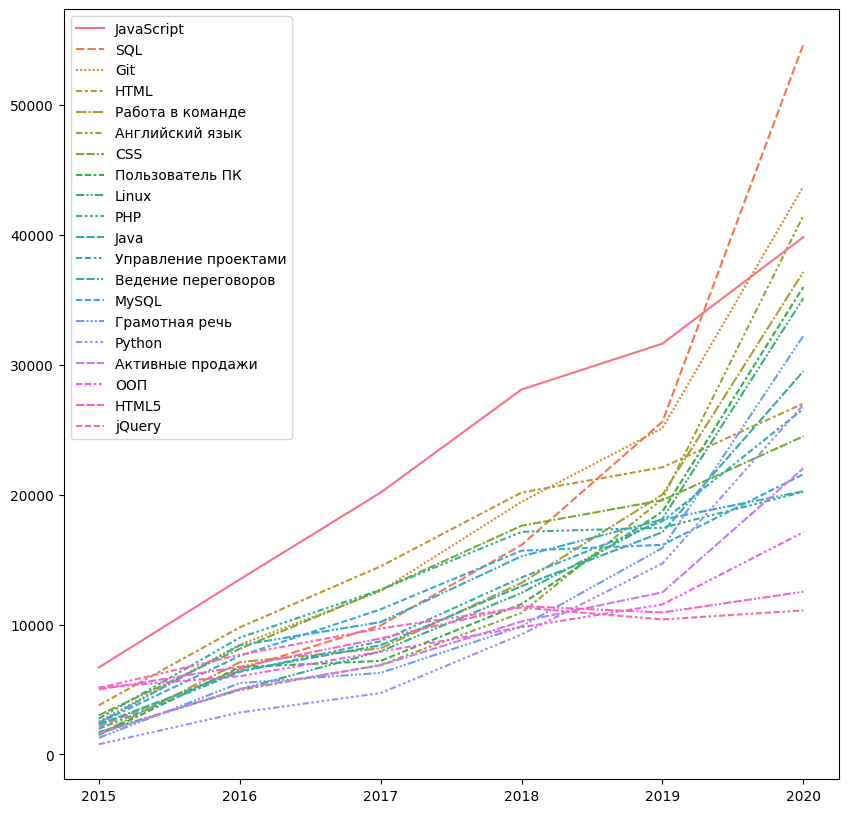

In [ ]:
visualize_lineplot(top_key_skills)

## 2.3 Изменение заработных плат (верхней и нижней границ)


### Промежуточные результаты

In [ ]:
use_columns = ['salary_from', 'salary_to', 'salary_gross', 'salary_currency']

df = get_df(2003, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   salary_from      0 non-null      float64
 1   salary_to        1070 non-null   float64
 2   salary_gross     0 non-null      float64
 3   salary_currency  1070 non-null   object 
dtypes: float64(3), object(1)
memory usage: 62.1+ KB
None


salary_from  salary_to  salary_gross salary_currency
710           NaN     2500.0           NaN             USD
455           NaN        NaN           NaN             NaN
1272          NaN     3500.0           NaN             USD
367           NaN        NaN           NaN             NaN
211           NaN     2500.0           NaN             USD

In [ ]:
df.sample(5)

salary_from  salary_to  salary_gross salary_currency
1667          NaN        NaN           NaN             NaN
914           NaN        NaN           NaN             NaN
1060          NaN        NaN           NaN             NaN
1113          NaN        NaN           NaN             NaN
70            NaN        NaN           NaN             NaN

In [ ]:
df.salary_currency.unique()

array([nan, 'USD'], dtype=object)

Видно, что в ранних датасетах нет данных о минимальной зарплате, во всех вакансиях в качестве валюты оплаты указаны доллары, а также нет информации о том, указана зарплата до налогов или после. Посмотрим изменение зарплат в рублях, в случае отсутствия данных о налогах можно считать, что указана зарплата после уплаты налогов, как это по умолчанию это считается в России.



In [ ]:
def count_val(df, data, add_condition, val):

  try:
    value = round(val(list(filter(lambda val: isinstance(val, Number), \
                                                        df[add_condition & df[data].notna()][data].values))))
  except Exception:
    value = np.nan

  return value


def get_sal_changes(start_year, finish_year, currency):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['salary_from', 'salary_to', 'salary_gross', 'salary_currency'])
    condition = ((df.salary_currency == currency) \
                  & ((df.salary_gross.isna()) \
                    | (df.salary_gross == False)))
    avg_min_wage = count_val(df, 'salary_from', condition, statistics.mean)
    avg_max_wage = count_val(df, 'salary_to', condition, statistics.mean)
    try:
      avg_wage = round(statistics.mean([avg_min_wage, avg_max_wage]))
    except Exception:
      avg_wage = np.nan
    median_min_wage = count_val(df, 'salary_from', condition, statistics.median)
    median_max_wage = count_val(df, 'salary_to', condition, statistics.median)
    mode_min_wage = count_val(df, 'salary_from', condition, statistics.mode)
    mode_max_wage = count_val(df, 'salary_to', condition, statistics.mode)

    show_data = pd.DataFrame({'avg_min_wage': avg_min_wage,
                              'avg_max_wage': avg_max_wage,
                              'avg_wage': avg_wage,
                              'median_min_wage': median_min_wage,
                              'median_max_wage': median_max_wage,
                              'mode_min_wage': mode_min_wage,
                              'mode_max_wage': mode_max_wage},
                            index=[year])
    data = pd.concat([data, show_data])

  return data


In [ ]:
data_sal_changes = get_sal_changes(2003, 2020, 'RUR')
data_sal_changes

avg_min_wage  avg_max_wage  avg_wage  median_min_wage  median_max_wage  \
2003           NaN           NaN       NaN              NaN              NaN   
2004           NaN           NaN       NaN              NaN              NaN   
2005           NaN           NaN       NaN              NaN              NaN   
2006           NaN           NaN       NaN              NaN              NaN   
2007       33985.0       45070.0   39528.0          30000.0          40000.0   
2008       38290.0       51291.0   44790.0          32000.0          45000.0   
2009       35536.0       51144.0   43340.0          30000.0          45000.0   
2010       36811.0       52488.0   44650.0          30000.0          45000.0   
2011       39482.0       57313.0   48398.0          32500.0          50000.0   
2012       40109.0       58944.0   49526.0          30000.0          50000.0   
2013       42283.0       61149.0   51716.0          30000.0          50000.0   
2014       41333.0       62506.0   51920.0          35000.0          50000.0   
2015       41974.0       66238.0   54106.0          30000.0          50000.0   
2016       46816.0       81785.0   64300.0          35000.0          53000.0   
2017       50578.0       75632.0   63105.0          40000.0          60000.0   
2018       53476.0       79625.0   66550.0          40000.0          60000.0   
2019       57735.0       86725.0   72230.0          50000.0          70000.0   
2020       61578.0       94192.0   77885.0          50000.0          75000.0   

      mode_min_wage  mode_max_wage  
2003            NaN            NaN  
2004            NaN            NaN  
2005            NaN            NaN  
2006            NaN            NaN  
2007        20000.0        40000.0  
2008        30000.0        60000.0  
2009        30000.0        50000.0  
2010        30000.0        50000.0  
2011        30000.0        50000.0  
2012        30000.0        50000.0  
2013        30000.0        50000.0  
2014        30000.0        50000.0  
2015        30000.0        80000.0  
2016        30000.0        50000.0  
2017        30000.0        50000.0  
2018        30000.0        50000.0  
2019        40000.0        60000.0  
2020        30000.0       100000.0

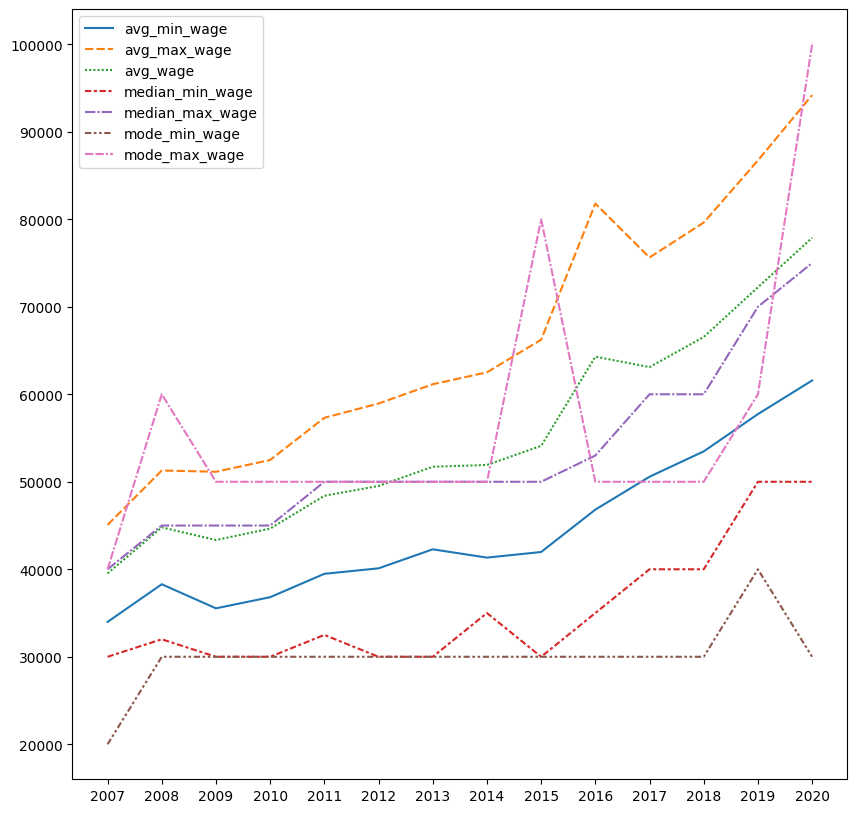

In [ ]:
visualize_lineplot(data_sal_changes.iloc[4:])

Моды оказались не слишком показательны:

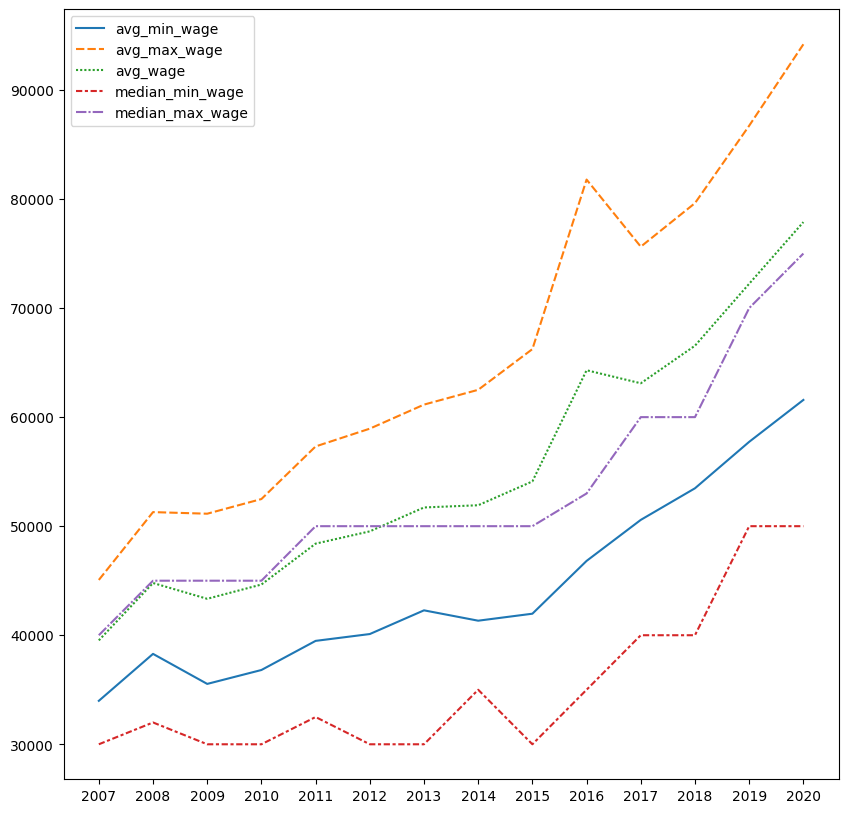

In [ ]:
visualize_lineplot(data_sal_changes.iloc[4:][['avg_min_wage', 'avg_max_wage', 'avg_wage',
                                              'median_min_wage', 'median_max_wage']])

Посмотрим на рост зарплат в процентном соотношении год к году:

In [ ]:
def sal_percente_change(initial_data):

  data = pd.DataFrame()
  for year in initial_data.index[1:]:
    if year+1 <= initial_data.index[-1]:

      perc_avg_min_wage = round(((initial_data.loc[year+1].avg_min_wage \
                                / initial_data.loc[year].avg_min_wage) * 100) - 100, 1)
      perc_avg_max_wage = round(((initial_data.loc[year+1].avg_max_wage \
                                / initial_data.loc[year].avg_max_wage) * 100) - 100, 1)
      perc_avg_wage = round(((initial_data.loc[year+1].avg_wage \
                            / initial_data.loc[year].avg_wage) * 100) - 100, 1)
      perc_median_min_wage = round(((initial_data.loc[year+1].median_min_wage \
                                    / initial_data.loc[year].median_min_wage) * 100) - 100, 1)
      perc_median_max_wage = round(((initial_data.loc[year+1].median_max_wage \
                                    / initial_data.loc[year].median_max_wage) * 100) - 100, 1)
      perc_mode_min_wage = round(((initial_data.loc[year+1].mode_min_wage \
                                  / initial_data.loc[year].mode_min_wage) * 100) - 100, 1)
      perc_mode_max_wage = round(((initial_data.loc[year+1].mode_max_wage \
                                  / initial_data.loc[year].mode_max_wage) * 100) - 100, 1)

      show_data = pd.DataFrame({'perc_avg_min_wage_change': perc_avg_min_wage,
                                'perc_avg_max_wage_change': perc_avg_max_wage,
                                'perc_avg_wage_change': perc_avg_wage,
                                'perc_median_min_wage_change': perc_median_min_wage,
                                'perc_median_max_wage_change': perc_median_max_wage,
                                'perc_mode_min_wage_change': perc_mode_min_wage,
                                'perc_mode_max_wage_change': perc_mode_max_wage},
                              index=[year+1])
      data = pd.concat([data, show_data])

  return data


In [ ]:
data_sal_percente_change = sal_percente_change(data_sal_changes)
data_sal_percente_change

perc_avg_min_wage_change  perc_avg_max_wage_change  \
2005                       NaN                       NaN   
2006                       NaN                       NaN   
2007                       NaN                       NaN   
2008                      12.7                      13.8   
2009                      -7.2                      -0.3   
2010                       3.6                       2.6   
2011                       7.3                       9.2   
2012                       1.6                       2.8   
2013                       5.4                       3.7   
2014                      -2.2                       2.2   
2015                       1.6                       6.0   
2016                      11.5                      23.5   
2017                       8.0                      -7.5   
2018                       5.7                       5.3   
2019                       8.0                       8.9   
2020                       6.7                       8.6   

      perc_avg_wage_change  perc_median_min_wage_change  \
2005                   NaN                          NaN   
2006                   NaN                          NaN   
2007                   NaN                          NaN   
2008                  13.3                          6.7   
2009                  -3.2                         -6.2   
2010                   3.0                          0.0   
2011                   8.4                          8.3   
2012                   2.3                         -7.7   
2013                   4.4                          0.0   
2014                   0.4                         16.7   
2015                   4.2                        -14.3   
2016                  18.8                         16.7   
2017                  -1.9                         14.3   
2018                   5.5                          0.0   
2019                   8.5                         25.0   
2020                   7.8                          0.0   

      perc_median_max_wage_change  perc_mode_min_wage_change  \
2005                          NaN                        NaN   
2006                          NaN                        NaN   
2007                          NaN                        NaN   
2008                         12.5                       50.0   
2009                          0.0                        0.0   
2010                          0.0                        0.0   
2011                         11.1                        0.0   
2012                          0.0                        0.0   
2013                          0.0                        0.0   
2014                          0.0                        0.0   
2015                          0.0                        0.0   
2016                          6.0                        0.0   
2017                         13.2                        0.0   
2018                          0.0                        0.0   
2019                         16.7                       33.3   
2020                          7.1                      -25.0   

      perc_mode_max_wage_change  
2005                        NaN  
2006                        NaN  
2007                        NaN  
2008                       50.0  
2009                      -16.7  
2010                        0.0  
2011                        0.0  
2012                        0.0  
2013                        0.0  
2014                        0.0  
2015                       60.0  
2016                      -37.5  
2017                        0.0  
2018                        0.0  
2019                       20.0  
2020                       66.7

Посмотрим на изменение срдених зарплат:

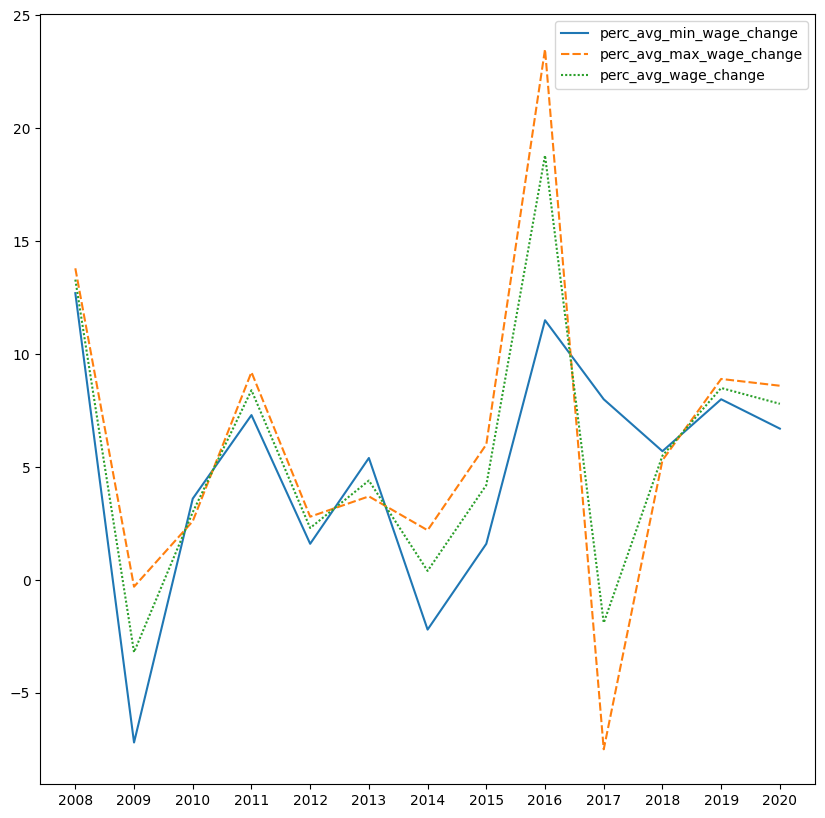

In [ ]:
visualize_lineplot(data_sal_percente_change.iloc[3:][['perc_avg_min_wage_change', 'perc_avg_max_wage_change', 'perc_avg_wage_change']])

Посмотрим на изменение медиан:

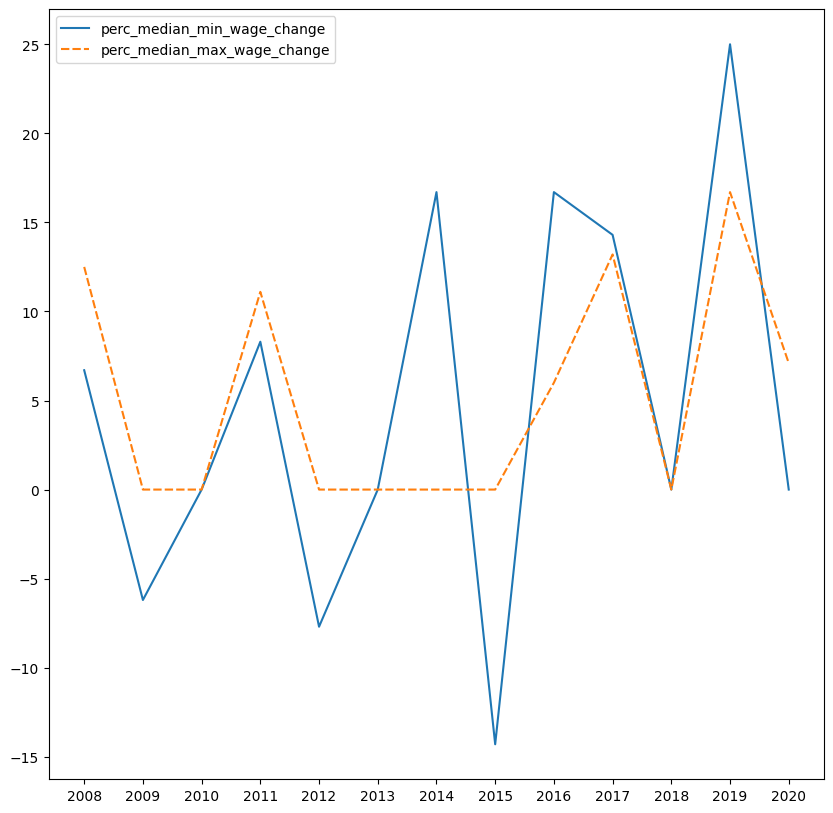

In [ ]:
visualize_lineplot(data_sal_percente_change.iloc[3:][['perc_median_min_wage_change', 'perc_median_max_wage_change']])

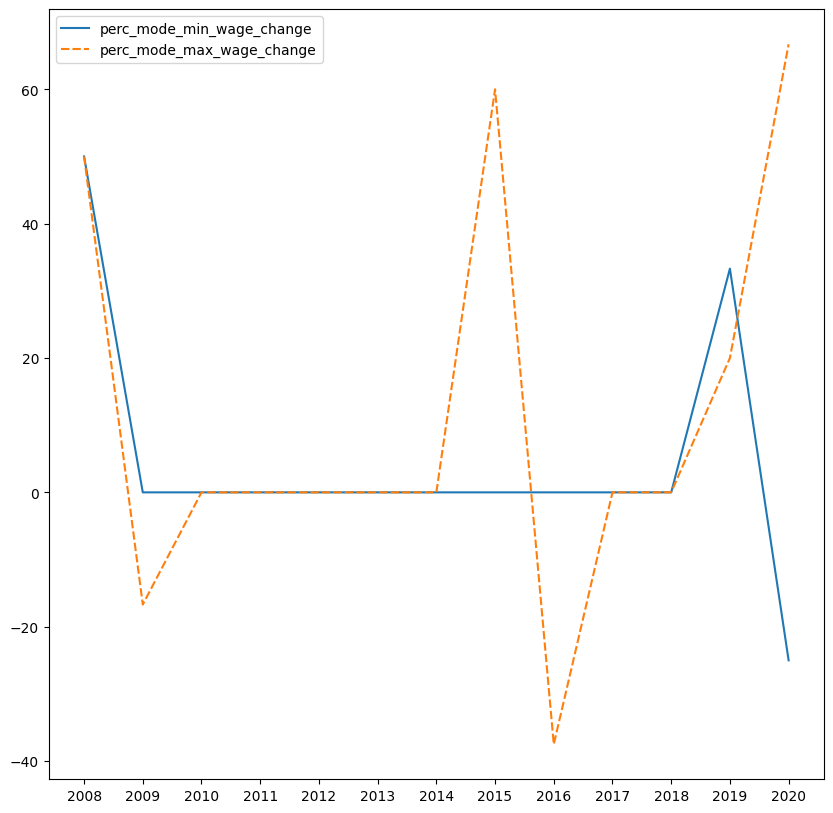

In [ ]:
visualize_lineplot(data_sal_percente_change.iloc[3:][['perc_mode_min_wage_change', 'perc_mode_max_wage_change']])

Посмотрим на то, как менялись зарплаты в долларах:

In [ ]:
usd_data_sal_changes = get_sal_changes(2003, 2020, 'USD')
usd_data_sal_changes

avg_min_wage  avg_max_wage  avg_wage  median_min_wage  median_max_wage  \
2003           NaN          1367       NaN              NaN             1000   
2004           NaN          1489       NaN              NaN             1200   
2005        1221.0         13849    7535.0           1000.0             1400   
2006        1292.0          1799    1546.0           1000.0             1500   
2007        1484.0          2103    1794.0           1200.0             1700   
2008        1827.0          2696    2262.0           1500.0             2000   
2009        1457.0          2411    1934.0           1000.0             1800   
2010        1699.0          2548    2124.0           1000.0             2000   
2011        1299.0          2279    1789.0            900.0             2000   
2012        1824.0          2419    2122.0           1000.0             1900   
2013        3654.0          2771    3212.0           1000.0             2000   
2014        1362.0          2347    1854.0           1000.0             2000   
2015        1678.0          2244    1961.0           1000.0             2000   
2016        2718.0          2948    2833.0           1000.0             2100   
2017        1968.0          2969    2468.0           1500.0             2500   
2018        3626.0          5312    4469.0           1800.0             3000   
2019        1524.0          2534    2029.0           1100.0             2100   
2020        1481.0          2389    1935.0           1200.0             2000   

      mode_min_wage  mode_max_wage  
2003            NaN           1000  
2004            NaN           1500  
2005         1500.0           1500  
2006         1000.0           1500  
2007         1000.0           2000  
2008         1000.0           2000  
2009         1000.0           1000  
2010         1000.0           2000  
2011          500.0           2000  
2012         1000.0           2000  
2013         1000.0           2500  
2014         1000.0           3000  
2015         1000.0           2000  
2016         1000.0           3000  
2017         2000.0           3000  
2018         2000.0           3000  
2019         1000.0           3000  
2020         1000.0           2000

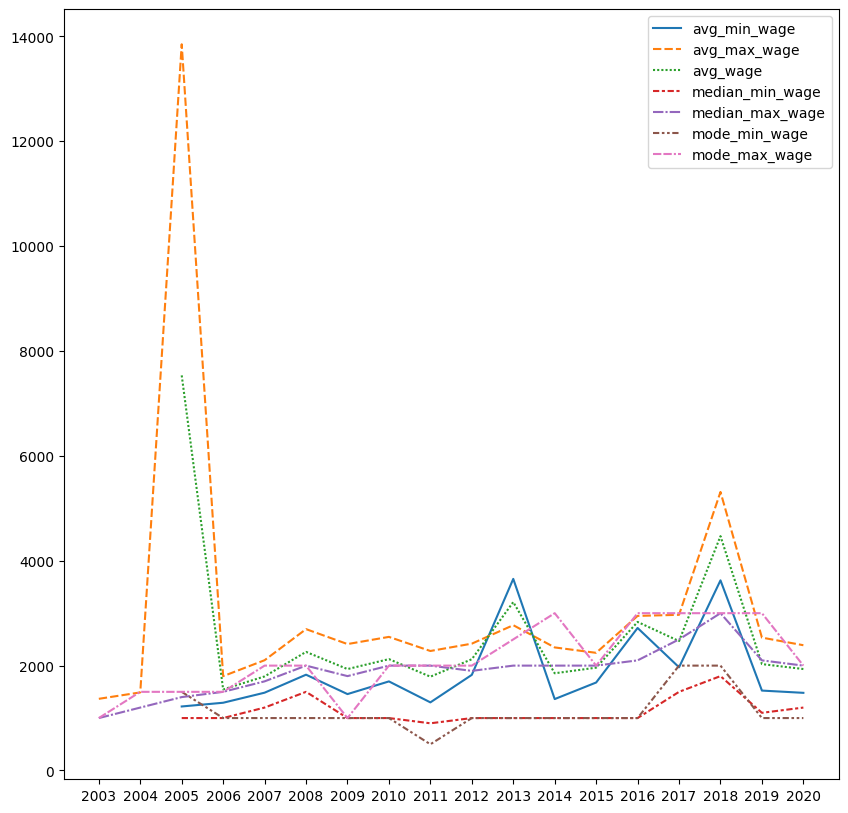

In [ ]:
visualize_lineplot(usd_data_sal_changes)

Видно, что в 2005 есть существенные выбросы. Посмотрим на них:

In [ ]:
df = get_df(2005)
df[df.salary_to > 10000]

id                                        description  key_skills  \
3594    77374  <p class="MsoBodyText" style="MARGIN: 0cm 0cm ...         NaN   
4387   104856  Требования к кандидатам: <br />высшее техничес...         NaN   
5832    97222  <p>В немецкую торговую Компанию приглашается н...         NaN   
7652   216747  \r\n<p class="MsoNormal" style="margin: 0cm 0c...         NaN   
8005    81345  Компания Digital Design приглашает Специалиста...         NaN   
8043    82070  Компания Digital Design приглашает на работу С...         NaN   
11010  117184  <p><strong>Менеджер проекта </strong>в российс...         NaN   
12219  126448  <font face="Verdana" size="2">At Nortel we bel...         NaN   
12220  126455  <font face="Verdana" size="2">At Nortel we bel...         NaN   
12284  127185  Unique opportunity to join NORTEL – a recogniz...         NaN   
13713  170049  <p><span class="bold"><span class="bold"><stro...         NaN   
15339  144351  <p><span class="bold"><span class="bold"><stro...         NaN   

      schedule_id schedule_name  accept_handicapped  accept_kids  \
3594      fullDay   Полный день               False        False   
4387      fullDay   Полный день               False        False   
5832      fullDay   Полный день               False        False   
7652      fullDay   Полный день               False        False   
8005      fullDay   Полный день               False        False   
8043      fullDay   Полный день               False        False   
11010     fullDay   Полный день               False        False   
12219     fullDay   Полный день               False        False   
12220     fullDay   Полный день               False        False   
12284     fullDay   Полный день               False        False   
13713     fullDay   Полный день               False        False   
15339     fullDay   Полный день               False        False   

      experience_id     experience_name  \
3594   between1And3  От 1 года до 3 лет   
4387   between3And6       От 3 до 6 лет   
5832   between1And3  От 1 года до 3 лет   
7652   between3And6       От 3 до 6 лет   
8005   between1And3  От 1 года до 3 лет   
8043   between1And3  От 1 года до 3 лет   
11010  between1And3  От 1 года до 3 лет   
12219  between1And3  От 1 года до 3 лет   
12220  between1And3  От 1 года до 3 лет   
12284  noExperience           Нет опыта   
13713  between1And3  От 1 года до 3 лет   
15339  between1And3  От 1 года до 3 лет   

                                         specializations  contacts  \
3594   1.3 CTO, CIO, Директор по IT 1 Информационные ...       NaN   
4387   1.270 Сетевые технологии 1 Информационные техн...       NaN   
5832   1.273 Системный администратор 1 Информационные...       NaN   
7652   5.219 Привлечение клиентов 5 Банки, инвестиции...       NaN   
8005   1.82 Инженер 1 Информационные технологии, инте...       NaN   
8043   1.50 Системы управления предприятием (ERP) 1 И...       NaN   
11010  1.272 Системная интеграция 1 Информационные те...       NaN   
12219  1.272 Системная интеграция 1 Информационные те...       NaN   
12220  1.272 Системная интеграция 1 Информационные те...       NaN   
12284  1.172 Начальный уровень, Мало опыта 1 Информац...       NaN   
13713  1.221 Программирование, Разработка 1 Информаци...       NaN   
15339  1.221 Программирование, Разработка 1 Информаци...       NaN   

      billing_type_id billing_type_name  allow_messages  premium  \
3594         standard          Стандарт            True    False   
4387         standard          Стандарт            True    False   
5832         standard          Стандарт            True    False   
7652         standard          Стандарт            True    False   
8005         standard          Стандарт            True    False   
8043         standard          Стандарт            True    False   
11010        standard          Стандарт            True    False   
12219        standard          Стандарт            True    False   
12

Ограничим максимальные зарплаты 100 тыс. долларов и переделаем анализ:

In [ ]:
df[(df.salary_to.notna()) & (df.salary_to <= 100000)].salary_to.values.std()

1455.3844507595722

In [ ]:
def count_val(df, data, add_condition, val):

  try:
    value = round(val(list(filter(lambda val: isinstance(val, Number), \
                                                        df[add_condition & df[data].notna()][data].values))))
  except Exception:
    value = np.nan

  return value


def get_sal_changes(start_year, finish_year, currency):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['salary_from', 'salary_to', 'salary_gross', 'salary_currency'])
    if currency == 'USD':
      condition = ((df.salary_to <= 100000) \
                   & (df.salary_currency == currency) \
                    & ((df.salary_gross.isna()) \
                      | (df.salary_gross == False)))
    else:
      condition = ((df.salary_currency == currency) \
                    & ((df.salary_gross.isna()) \
                      | (df.salary_gross == False)))
    avg_min_wage = count_val(df, 'salary_from', condition, statistics.mean)
    avg_max_wage = count_val(df, 'salary_to', condition, statistics.mean)
    try:
      avg_wage = round(statistics.mean([avg_min_wage, avg_max_wage]))
    except Exception:
      avg_wage = np.nan
    median_min_wage = count_val(df, 'salary_from', condition, statistics.median)
    median_max_wage = count_val(df, 'salary_to', condition, statistics.median)
    mode_min_wage = count_val(df, 'salary_from', condition, statistics.mode)
    mode_max_wage = count_val(df, 'salary_to', condition, statistics.mode)

    show_data = pd.DataFrame({'avg_min_wage': avg_min_wage,
                              'avg_max_wage': avg_max_wage,
                              'avg_wage': avg_wage,
                              'median_min_wage': median_min_wage,
                              'median_max_wage': median_max_wage,
                              'mode_min_wage': mode_min_wage,
                              'mode_max_wage': mode_max_wage},
                            index=[year])
    data = pd.concat([data, show_data])

  return data


In [ ]:
usd_data_sal_changes = get_sal_changes(2003, 2020, 'USD')
usd_data_sal_changes

avg_min_wage  avg_max_wage  avg_wage  median_min_wage  median_max_wage  \
2003           NaN          1367       NaN              NaN             1000   
2004           NaN          1489       NaN              NaN             1200   
2005        1223.0          1664    1444.0           1000.0             1400   
2006        1268.0          1799    1534.0           1000.0             1500   
2007        1443.0          2103    1773.0           1100.0             1700   
2008        1670.0          2660    2165.0           1300.0             2000   
2009        1432.0          2411    1922.0           1000.0             1800   
2010        1557.0          2494    2026.0           1000.0             2000   
2011        1213.0          2279    1746.0            700.0             2000   
2012        1306.0          2386    1846.0           1000.0             1900   
2013        1357.0          2659    2008.0           1000.0             2000   
2014        1264.0          2286    1775.0           1000.0             2000   
2015        1389.0          2244    1816.0           1000.0             2000   
2016        1849.0          2948    2398.0           1200.0             2100   
2017        2136.0          2969    2552.0           1500.0             2500   
2018        4487.0          5312    4900.0           2000.0             3000   
2019        1577.0          2534    2056.0           1200.0             2100   
2020        1438.0          2389    1914.0           1000.0             2000   

      mode_min_wage  mode_max_wage  
2003            NaN           1000  
2004            NaN           1500  
2005         1500.0           1500  
2006         1000.0           1500  
2007         1000.0           2000  
2008         1000.0           2000  
2009         1000.0           1000  
2010         1500.0           2000  
2011          500.0           2000  
2012         1000.0           2000  
2013         1000.0           2500  
2014         1000.0           3000  
2015          500.0           2000  
2016         1000.0           3000  
2017         2000.0           3000  
2018         2000.0           3000  
2019         1000.0           3000  
2020         1000.0           2000

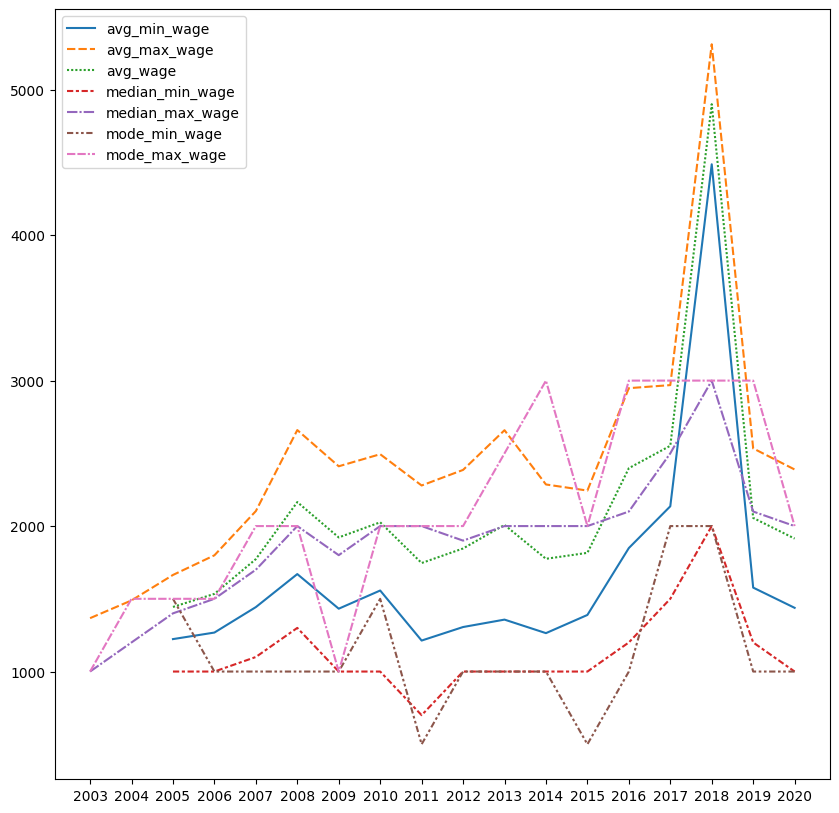

In [ ]:
visualize_lineplot(usd_data_sal_changes)

Посмотрим на пик в 2018 году:

In [ ]:
df = get_df(2018)

In [ ]:
df[(df.salary_currency == 'USD') & (df.salary_to >= 10000)]

id                                        description  \
575     28727419  <p><strong>We&#39;re running an Online Hiring ...   
576     28727420  <p><strong>We&#39;re running an Online Hiring ...   
577     28727421  <p><strong>We&#39;re running an Online Hiring ...   
578     28727422  <p><strong>We&#39;re running an Online Hiring ...   
11911   27759204  <p><strong>We&#39;re running an Online Hiring ...   
...          ...                                                ...   
517385  24077538  <p>- $10,000/month - REMOTE</p> <p>We are look...   
517386  24077539  <p>- $10,000/month - REMOTE</p> <p>We are look...   
517409  24077670  <p>- $16500/month - REMOTE</p> <p><strong>VP o...   
517410  24077671  <p>- $16500/month - REMOTE</p> <p><strong>VP o...   
517411  24077672  <p>- $16500/month - REMOTE</p> <p><strong>VP o...   

                                               key_skills schedule_id  \
575     VP of Marketing\nB2B Marketing\nB2C Marketing\...      remote   
576     VP of Marketing\nB2B Marketing\nB2C Marketing\...      remote   
577     VP of Marketing\nB2B Marketing\nB2C Marketing\...      remote   
578     VP of Marketing\nB2B Marketing\nB2C Marketing\...      remote   
11911   Administration Management\nAgile Project Manag...      remote   
...                                                   ...         ...   
517385  Hybris\nJava\nJava EE\nSpring Framework\nHTML5...      remote   
517386  Hybris\nJava\nJava EE\nSpring Framework\nHTML5...      remote   
517409                     CTO\nCIO\nIT Manager\nJava\nC#      remote   
517410                     CTO\nCIO\nIT Manager\nJava\nC#      remote   
517411                     CTO\nCIO\nIT Manager\nJava\nC#      remote   

           schedule_name  accept_handicapped  accept_kids experience_id  \
575     Удаленная работа               False        False     moreThan6   
576     Удаленная работа               False        False     moreThan6   
577     Удаленная работа               False        False     moreThan6   
578     Удаленная работа               False        False     moreThan6   
11911   Удаленная работа               False        False     moreThan6   
...                  ...                 ...          ...           ...   
517385  Удаленная работа               False        False  between3And6   
517386  Удаленная работа               False        False  between3And6   
517409  Удаленная работа               False        False     moreThan6   
517410  Удаленная работа               False        False     moreThan6   
517411  Удаленная работа               False        False     moreThan6   

       experience_name                                    specializations  \
575        Более 6 лет  9.139 Маркетинг, Реклама, PR 9 Высший менеджме...   
576        Более 6 лет  9.139 Маркетинг, Реклама, PR 9 Высший менеджме...   
577        Более 6 лет  9.139 Маркетинг, Реклама, PR 9 Высший менеджме...   
578        Более 6 лет  9.139 Маркетинг, Реклама, PR 9 Высший менеджме...   
11911      Более 6 лет  9.94 Информационные технологии, Интернет, Муль...   
...                ...                                                ...   
517385   От 3 до 6 лет  1.203 Передача данных и доступ в интернет 1 Ин...   
517386   От 3 до 6 лет  1.203 Передача данных и доступ в интернет 1 Ин...   
517409     Более 6 лет  1.221 Программирование, Разработка 1 Информаци...   
517410     Более 6 лет  1.221 Программирование, Разработка 1 Информаци...   
517411     Более 6 лет  1.221 Программирование, Разработка 1 Информаци...   

        contacts billing_type_id billing_type_name  allow_messages  premium  \
575          NaN        standard          Стандарт            True    False   
576          NaN        standard          Стандарт            True    False   
577          NaN        standard          Стандарт            True    False   
578          NaN        standard          Стандарт            True    False   
11911        NaN         premium           Премиум            T

In [ ]:
print(df.iloc[517385].description)
print(df.iloc[517386].description)

<p>- $10,000/month - REMOTE</p> <p>We are looking for career problem solvers to join our team of software specialists working with the Hybris platform to deliver eCommerce web applications. If you thrive in fast-paced, interactive environments, this job is for you.</p> <p> </p> <p>Job Description:</p> <p>As a Hybris Developer you will be responsible for the development and support of flagship websites on the Hybris e-commerce platform. You will ideally have experience in Java/JEE and e-commerce technologies and be well versed in delivering and supporting technical solutions.</p> <p>Company Description:</p> <p>BORN Group lives at the intersection of content and commerce. We are a 700+ person full service digital commerce agency delivering enterprise scale commerce solutions to fortune ranked companies across the globe. We have offices and presences in more than 10 countries around the world. We provide solutions integration for Hybris, SFCC, Magento, SAP, Big Commerce, Shopify Plus and 

Он объясняется тем, что при поиске сотрудников на удаленную работу компании размещают несколько объявляений в разных регионах фактически на одно ваканстное место. Таким образом средняя заработная плата искусственно изменяется, в данном случае в большую сторону.

In [ ]:
df = get_df(2019)

In [ ]:
df[(df.salary_currency == 'USD') & (df.salary_to >= 10000)]

id                                        description  \
11620   33094600  <p><strong>В охранное агентство требуется техн...   
35651   29954568  <p><strong>VP of Professional Services ($200K/...   
35652   29954569  <p><strong>VP of Professional Services ($200K/...   
35653   29954570  <p><strong>VP of Professional Services ($200K/...   
35669   29954651  <p><strong>Senior VP of Professional Services ...   
...          ...                                                ...   
471057  33010637  <p><strong>CTO </strong></p> <p>(обязательно н...   
471472  33014040  <p><strong>Chief</strong> <strong>Technology</...   
509218  33669114  <p><strong>Our client is Salesforce Consulting...   
509629  29517026  <p>Are you a full stack JavaScript developer i...   
518211  29985571  <p>This is a great opportunity for technical l...   

                                               key_skills schedule_id  \
11620   Выездное обслуживание\nобслуживание систем вид...     fullDay   
35651   telecommunications\ntelco\ntelecom\nbss\noss\n...      remote   
35652   telecommunications\ntelco\ntelecom\nbss\noss\n...      remote   
35653   telecommunications\ntelco\ntelecom\nbss\noss\n...      remote   
35669   senior vice president\nprofessional services\n...      remote   
...                                                   ...         ...   
471057  JavaScript\nHTML\nCSS\nAngularJS\nProject mana...     fullDay   
471472  JavaScript\nHTML\nCSS\nAngularJS\nProject mana...     fullDay   
509218                                                NaN      remote   
509629         AngularJS\nGit\nLinux\nJavaScript\nNode.js     fullDay   
518211  C#\n.Net AWS\nLambda\nJSON API\nPython\nMobile...     fullDay   

           schedule_name  accept_handicapped  accept_kids experience_id  \
11620        Полный день               False        False  between1And3   
35651   Удаленная работа               False        False     moreThan6   
35652   Удаленная работа               False        False     moreThan6   
35653   Удаленная работа               False        False     moreThan6   
35669   Удаленная работа               False        False     moreThan6   
...                  ...                 ...          ...           ...   
471057       Полный день               False        False     moreThan6   
471472       Полный день               False        False     moreThan6   
509218  Удаленная работа               False        False  between3And6   
509629       Полный день               False        False  between3And6   
518211       Полный день               False        False     moreThan6   

           experience_name                                    specializations  \
11620   От 1 года до 3 лет  25.381 Сервисный инженер 25 Инсталляция и серв...   
35651          Более 6 лет  12.331 Управленческое консультирование 12 Конс...   
35652          Более 6 лет  12.331 Управленческое консультирование 12 Конс...   
35653          Более 6 лет  12.331 Управленческое консультирование 12 Конс...   
35669          Более 6 лет  12.331 Управленческое консультирование 12 Конс...   
...                    ...                                                ...   
471057         Более 6 лет  1.395 Банковское ПО 1 Информационные технологи...   
471472         Более 6 лет  1.395 Банковское ПО 1 Информационные технологи...   
509218       От 3 до 6 лет  1.221 Программирование, Разработка 1 Информаци...   
509629       От 3 до 6 лет  1.221 Программирование, Разработка 1 Информаци...   
518211         Более 6 лет  1.536 CRM системы 1 Информационные технологии,...   

        contacts billing_type_id billing_type_name  allow_messages  premium  \
11620        NaN            free        Бесплатная            True    False   
35651        NaN         premium           Премиум           False     True   
35652        NaN         premium           Премиум           False     True   
35653        NaN         premium           Премиум           False     True   
35669        Na

Пик на графике объясняется тем, что в 2018 году таких вакансий было в 6 раз больше, чем в соседних периодах.

Было бы правильно учитывать такие вакансии как одну. Примем, что если работа удаленная, а ключевые скилы, требуемый опыт, название сотрудника и нанематель совпадают, то такие несколько вакансий следует считать за одну.

In [ ]:
df = get_df(2018, ['key_skills',
                   'schedule_id',
                   'experience_id',
                   'employer_id',
                   'name',
                   'salary_from', 'salary_to', 'salary_gross', 'salary_currency'])

In [ ]:
df_remote = df[df.schedule_id == 'remote']
df_non_remote = df[df.schedule_id != 'remote']

In [ ]:
print(len(df_remote))
df_remote[df_remote.salary_to > 70000][:5]

43651


key_skills schedule_id  \
162                Magento\nPHP\nGit\nРефакторинг кода      remote   
461             PHP\nJoomla CMS\nCSS\nHTML\nJavaScript      remote   
465             PHP\nJoomla CMS\nCSS\nHTML\nJavaScript      remote   
510  Internet Marketing\nSocial Media Marketing\nИн...      remote   
525  JavaScript\nPHP\nHTML\nCSS\njQuery\nBootstrap\...      remote   

    experience_id  employer_id  salary_from  salary_to salary_gross  \
162  between3And6    1723738.0      50000.0   110000.0         True   
461  between1And3     747028.0     100000.0   150000.0        False   
465  between1And3     747028.0     100000.0   150000.0        False   
510  between1And3    1823894.0      50000.0    80000.0        False   
525  between3And6    3591042.0      50000.0   100000.0        False   

    salary_currency                               name  
162             RUR                Magento-разработчик  
461             RUR  Full Stack веб-разработчик Joomla  
465             RUR  Full Stack веб-разработчик Joomla  
510             RUR         Таргетолог / Лидогенератор  
525             RUR      WordPress Front-End Developer

In [ ]:
grouped = df_remote.groupby(['key_skills',
                   'schedule_id',
                   'experience_id',
                   'employer_id',
                   'name',
                   'salary_gross', 'salary_currency'],
                  as_index=False).mean()
print(len(grouped))
grouped[:5]

7948


key_skills schedule_id  \
0  !находчивость\nдоброжелательность к любому кли...      remote   
1            .NET\nC#\nMS Visual Studio\nAzure cloud      remote   
2  .NET Framework\nASP.NET\nC#\nJavaScript\nHTML\...      remote   
3  .NET Framework\nASP.NET\nC#\nJavaScript\nMS SQ...      remote   
4                   .NET Framework\nASP.NET\nC#\nSQL      remote   
5  .NET Framework\nASP.NET\nMS SQL\nGit\nEntity F...      remote   
6  .NET Framework\nASP.NET\nMS SQL\nMVC\nJavaScri...      remote   
7  .NET Framework\nASP.NET\nMVC\nC#\nMS SQL Serve...      remote   
8                 .NET Framework\nAngularJS\nASP.NET      remote   
9                                 .NET Framework\nC#      remote   

  experience_id  employer_id                                        name  \
0  noExperience    2010067.0  Менеджер интернет-магазина детских товаров   
1     moreThan6     626303.0                            Разработчик .NET   
2     moreThan6    3119896.0                     FullStack Web-Developer   
3  between1And3    2968628.0    Разработчик бизнес-систем (программист)    
4  between1And3    1057258.0          Backend-разработчик .NET Core (C#)   
5     moreThan6    2652956.0                   .NET Back-end разработчик   
6  between1And3       1838.0            .NET Developer (Middle - Senior)   
7  between3And6    1756231.0        Backend разработчик C#, ASP.NET, MVC   
8  between1And3    3003888.0            Senior Backend C#/.NET Developer   
9  between1And3    3181723.0                              Программист C#   

   salary_gross salary_currency  salary_from  salary_to  
0         False             RUR      16000.0    26000.0  
1          True             USD       2500.0     3000.0  
2          True             RUR     200000.0        NaN  
3         False             BYR       1610.0     4020.0  
4         False             RUR     100000.0        NaN  
5         False             RUR      80000.0   130000.0  
6          True             RUR     175000.0        NaN  
7          True             RUR     100000.0   180000.0  
8         False             USD       3000.0        NaN  
9         False             RUR      15000.0    70000.0

In [ ]:
print(len(df_remote[df_remote.employer_id == 747028]))
print(len(grouped[grouped.employer_id == 747028]))
df_remote[df_remote.employer_id == 747028]

22
14


In [ ]:
pd.concat([df_non_remote, grouped], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


key_skills schedule_id  \
0                                                     NaN     fullDay   
1       B2B Продажи\nАктивные продажи\nВедение перегов...     fullDay   
2                                                     NaN     fullDay   
3                                                     NaN    flexible   
4                                                     NaN     fullDay   
...                                                   ...         ...   
481962   управление персоналом, управление проектами (2+)      remote   
481963  усидчивость\nСтрессоустойчивость\nСистемное мы...      remote   
481964  усидчивость\nумение работать с дедлайнами\nMS ...      remote   
481965  форматирование текста\nMS Word\nвнимательность...      remote   
481966      японский язык\nСоциальные сети\nблокчейн\nICO      remote   

       experience_id  employer_id  salary_from  salary_to salary_gross  \
0       between1And3     574211.0          NaN        NaN          NaN   
1       between1And3     662065.0          NaN        NaN          NaN   
2       noExperience    1898133.0          NaN        NaN          NaN   
3       noExperience      43410.0          NaN        NaN          NaN   
4       between1And3    1763369.0          NaN        NaN          NaN   
...              ...          ...          ...        ...          ...   
481962  between1And3    3193633.0      30000.0        NaN        False   
481963  noExperience    2514581.0      15000.0    25000.0        False   
481964  between3And6    3138357.0      20000.0    60000.0        False   
481965  between1And3        889.0      10000.0        NaN         True   
481966  between1And3    3337555.0          NaN    60000.0        False   

       salary_currency                                               name  
0                  NaN                    Программист С++ / С++ Developer  
1                  NaN                               Менеджер по продажам  
2                  NaN  Ведущий специалист контроля качества обслужива...  
3                  NaN        Специалист по абонентским подключениям (ИП)  
4                  NaN                               Специалист ИТ-отдела  
...                ...                                                ...  
481962             RUR                              Руководитель проектов  
481963             RUR                               Оператор колл-центра  
481964             RUR                                  Специалист по seo  
481965             RUR                                   Администратор БД  
481966             RUR             Community manager (Asia/японский язык)  

[481967 rows x 9 columns]

После этого будем объединять данные с вакансиями не на удаленнку, и анализировать:

### Финальный результат (доллары и рубли)

Анализ для долларов:

In [ ]:
def count_val(df, data, add_condition, val):

  try:
    value = round(val(list(filter(lambda val: isinstance(val, Number), \
                                                        df[add_condition & df[data].notna()][data].values))))
  except Exception:
    value = np.nan

  return value


def get_sal_changes(start_year, finish_year, currency):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['key_skills',
                      'schedule_id',
                      'experience_id',
                      'employer_id',
                      'name',
                      'salary_from', 'salary_to', 'salary_gross', 'salary_currency'])
    df_remote = df[df.schedule_id == 'remote']
    df_non_remote = df[df.schedule_id != 'remote']
    grouped = df_remote.groupby(['key_skills',
                                  'schedule_id',
                                  'experience_id',
                                  'employer_id',
                                  'name',
                                  'salary_gross', 'salary_currency']
                                , as_index=False).mean()
    df = pd.concat([df_non_remote, grouped], ignore_index=True)
    if currency == 'USD':
      condition = ((df.salary_to <= 100000) \
                   & (df.salary_currency == currency) \
                    & ((df.salary_gross.isna()) \
                      | (df.salary_gross == False)))
    else:
      condition = ((df.salary_currency == currency) \
                    & ((df.salary_gross.isna()) \
                      | (df.salary_gross == False)))
    avg_min_wage = count_val(df, 'salary_from', condition, statistics.mean)
    avg_max_wage = count_val(df, 'salary_to', condition, statistics.mean)
    try:
      avg_wage = round(statistics.mean([avg_min_wage, avg_max_wage]))
    except Exception:
      avg_wage = np.nan
    median_min_wage = count_val(df, 'salary_from', condition, statistics.median)
    median_max_wage = count_val(df, 'salary_to', condition, statistics.median)
    mode_min_wage = count_val(df, 'salary_from', condition, statistics.mode)
    mode_max_wage = count_val(df, 'salary_to', condition, statistics.mode)

    show_data = pd.DataFrame({'avg_min_wage': avg_min_wage,
                              'avg_max_wage': avg_max_wage,
                              'avg_wage': avg_wage,
                              'median_min_wage': median_min_wage,
                              'median_max_wage': median_max_wage,
                              'mode_min_wage': mode_min_wage,
                              'mode_max_wage': mode_max_wage},
                            index=[year])
    data = pd.concat([data, show_data])

  return data


In [ ]:
usd_data_sal_changes = get_sal_changes(2003, 2020, 'USD')
usd_data_sal_changes

avg_min_wage  avg_max_wage  avg_wage  median_min_wage  median_max_wage  \
2003           NaN          1367       NaN              NaN             1000   
2004           NaN          1489       NaN              NaN             1200   
2005        1223.0          1664    1444.0           1000.0             1400   
2006        1268.0          1799    1534.0           1000.0             1500   
2007        1443.0          2103    1773.0           1100.0             1700   
2008        1670.0          2660    2165.0           1300.0             2000   
2009        1433.0          2413    1923.0           1000.0             1800   
2010        1563.0          2503    2033.0           1000.0             2000   
2011        1549.0          2401    1975.0           1000.0             1800   
2012        1366.0          2469    1918.0           1000.0             1900   
2013        1318.0          2259    1788.0           1000.0             2000   
2014        1311.0          2264    1788.0           1000.0             2000   
2015        1446.0          2375    1910.0           1000.0             2000   
2016        1520.0          2809    2164.0           1000.0             2000   
2017        1670.0          2583    2126.0           1200.0             2000   
2018        2915.0          3774    3344.0           1500.0             2500   
2019        1511.0          2492    2002.0           1050.0             2000   
2020        1472.0          2499    1986.0           1000.0             2100   

      mode_min_wage  mode_max_wage  
2003            NaN           1000  
2004            NaN           1500  
2005         1500.0           1500  
2006         1000.0           1500  
2007         1000.0           2000  
2008         1000.0           2000  
2009         1000.0           1000  
2010         1500.0           2000  
2011         1000.0           1500  
2012         1000.0           2000  
2013         1000.0           2500  
2014         1000.0           3000  
2015         1000.0           2000  
2016         1000.0           3000  
2017         1000.0           3000  
2018         2000.0           3000  
2019         1000.0           3000  
2020         1000.0           2000

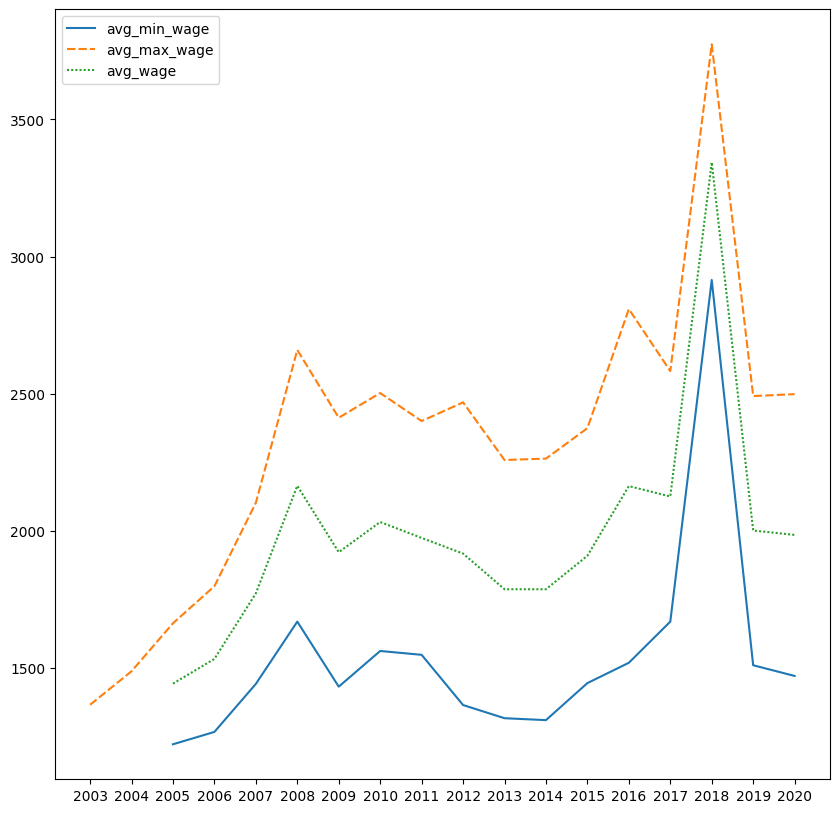

In [ ]:
visualize_lineplot(usd_data_sal_changes[['avg_min_wage', 'avg_max_wage', 'avg_wage']])

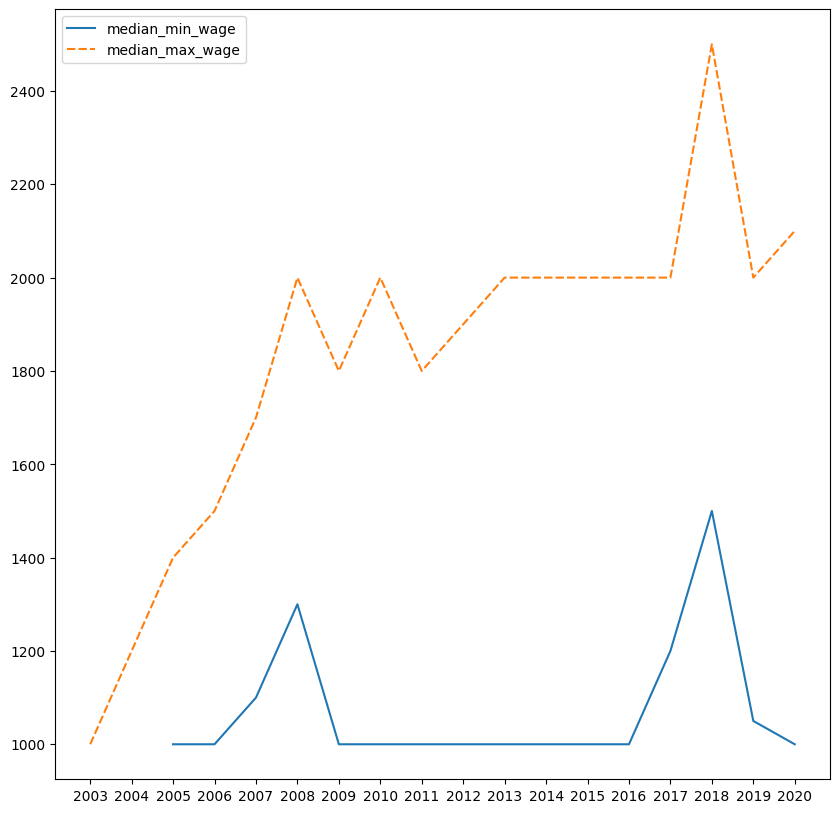

In [ ]:
visualize_lineplot(usd_data_sal_changes[['median_min_wage', 'median_max_wage']])

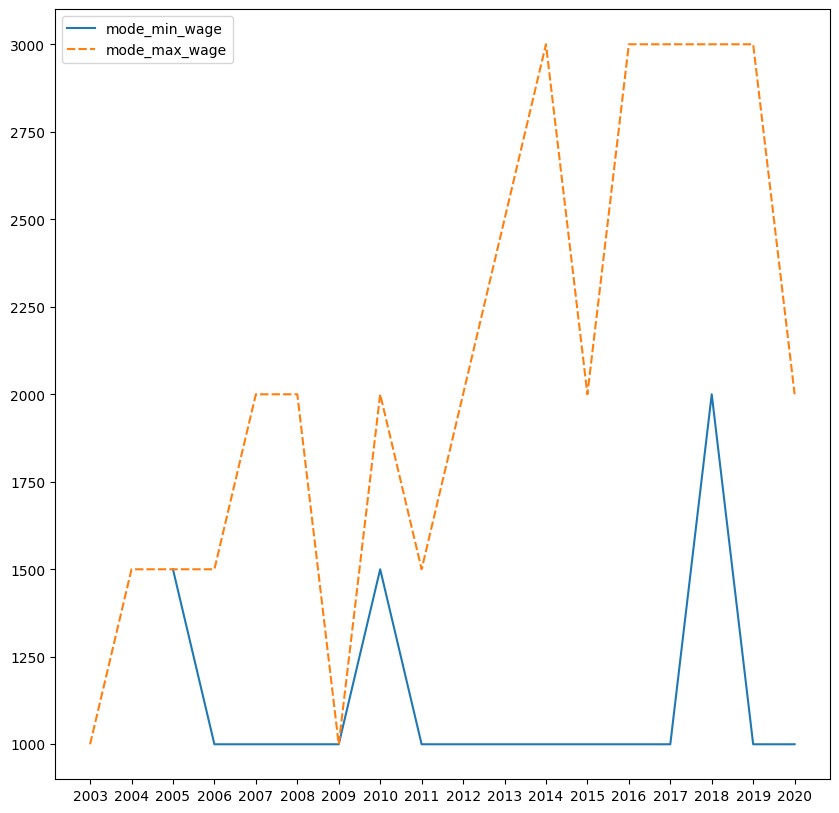

In [ ]:
visualize_lineplot(usd_data_sal_changes[['mode_min_wage', 'mode_max_wage']])

Посмотрим на измененеие в процентах год к году:

In [ ]:
usd_sal_percente_change = sal_percente_change(usd_data_sal_changes)
usd_sal_percente_change

perc_avg_min_wage_change  perc_avg_max_wage_change  \
2005                       NaN                      11.8   
2006                       3.7                       8.1   
2007                      13.8                      16.9   
2008                      15.7                      26.5   
2009                     -14.2                      -9.3   
2010                       9.1                       3.7   
2011                      -0.9                      -4.1   
2012                     -11.8                       2.8   
2013                      -3.5                      -8.5   
2014                      -0.5                       0.2   
2015                      10.3                       4.9   
2016                       5.1                      18.3   
2017                       9.9                      -8.0   
2018                      74.6                      46.1   
2019                     -48.2                     -34.0   
2020                      -2.6                       0.3   

      perc_avg_wage_change  perc_median_min_wage_change  \
2005                   NaN                          NaN   
2006                   6.2                          0.0   
2007                  15.6                         10.0   
2008                  22.1                         18.2   
2009                 -11.2                        -23.1   
2010                   5.7                          0.0   
2011                  -2.9                          0.0   
2012                  -2.9                          0.0   
2013                  -6.8                          0.0   
2014                   0.0                          0.0   
2015                   6.8                          0.0   
2016                  13.3                          0.0   
2017                  -1.8                         20.0   
2018                  57.3                         25.0   
2019                 -40.1                        -30.0   
2020                  -0.8                         -4.8   

      perc_median_max_wage_change  perc_mode_min_wage_change  \
2005                         16.7                        NaN   
2006                          7.1                      -33.3   
2007                         13.3                        0.0   
2008                         17.6                        0.0   
2009                        -10.0                        0.0   
2010                         11.1                       50.0   
2011                        -10.0                      -33.3   
2012                          5.6                        0.0   
2013                          5.3                        0.0   
2014                          0.0                        0.0   
2015                          0.0                        0.0   
2016                          0.0                        0.0   
2017                          0.0                        0.0   
2018                         25.0                      100.0   
2019                        -20.0                      -50.0   
2020                          5.0                        0.0   

      perc_mode_max_wage_change  
2005                        0.0  
2006                        0.0  
2007                       33.3  
2008                        0.0  
2009                      -50.0  
2010                      100.0  
2011                      -25.0  
2012                       33.3  
2013                       25.0  
2014                       20.0  
2015                      -33.3  
2016                       50.0  
2017                        0.0  
2018                        0.0  
2019                        0.0  
2020                      -33.3

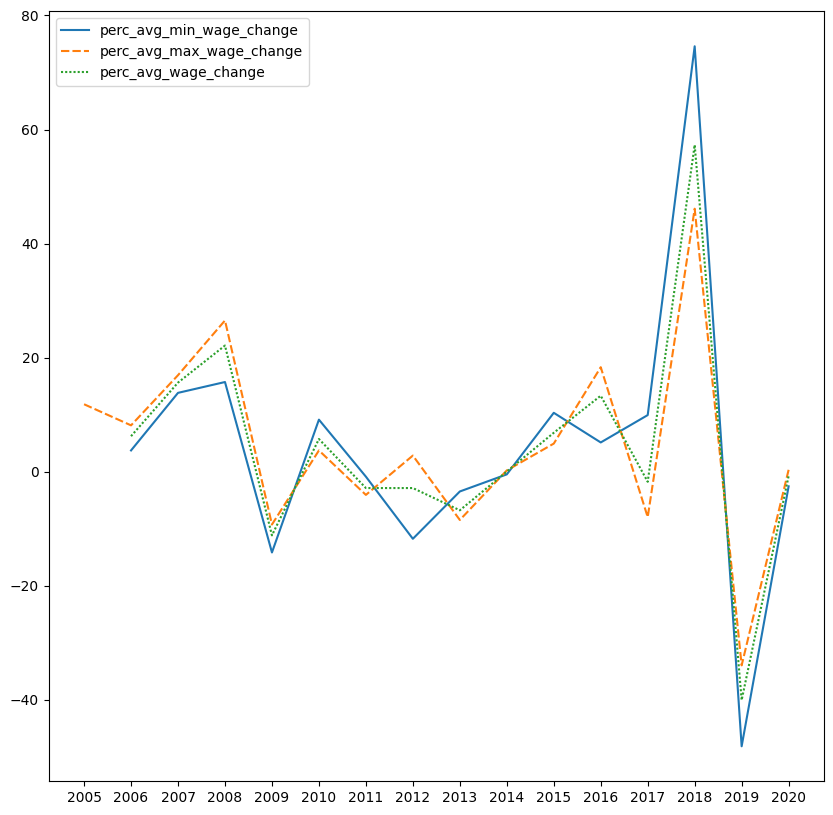

In [ ]:
visualize_lineplot(usd_sal_percente_change[['perc_avg_min_wage_change',
                                            'perc_avg_max_wage_change',
                                            'perc_avg_wage_change']])

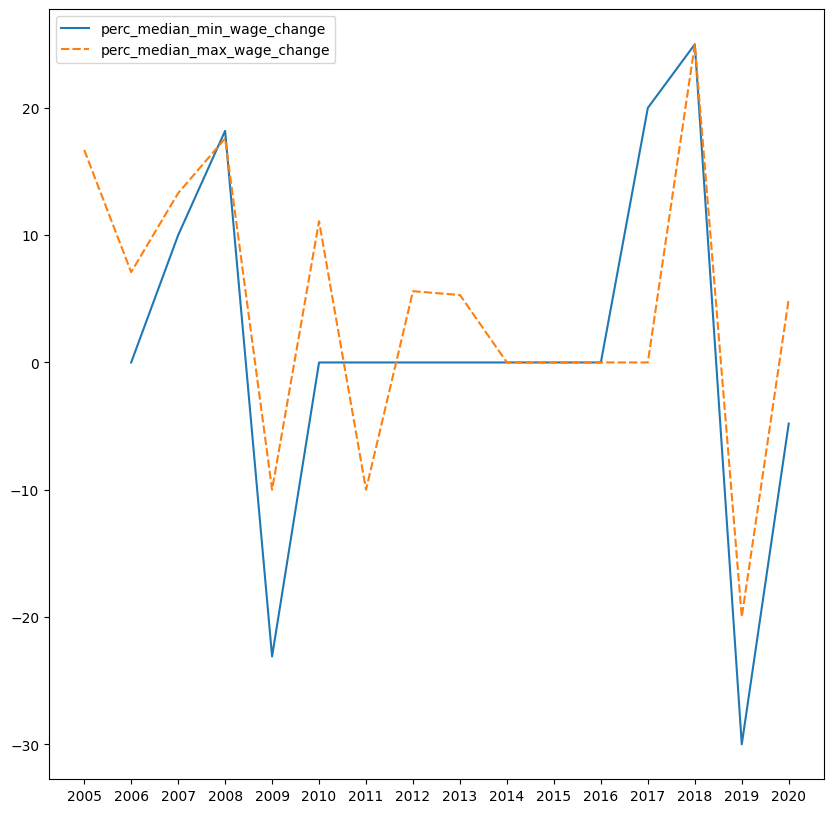

In [ ]:
visualize_lineplot(usd_sal_percente_change[['perc_median_min_wage_change',
                                            'perc_median_max_wage_change']])

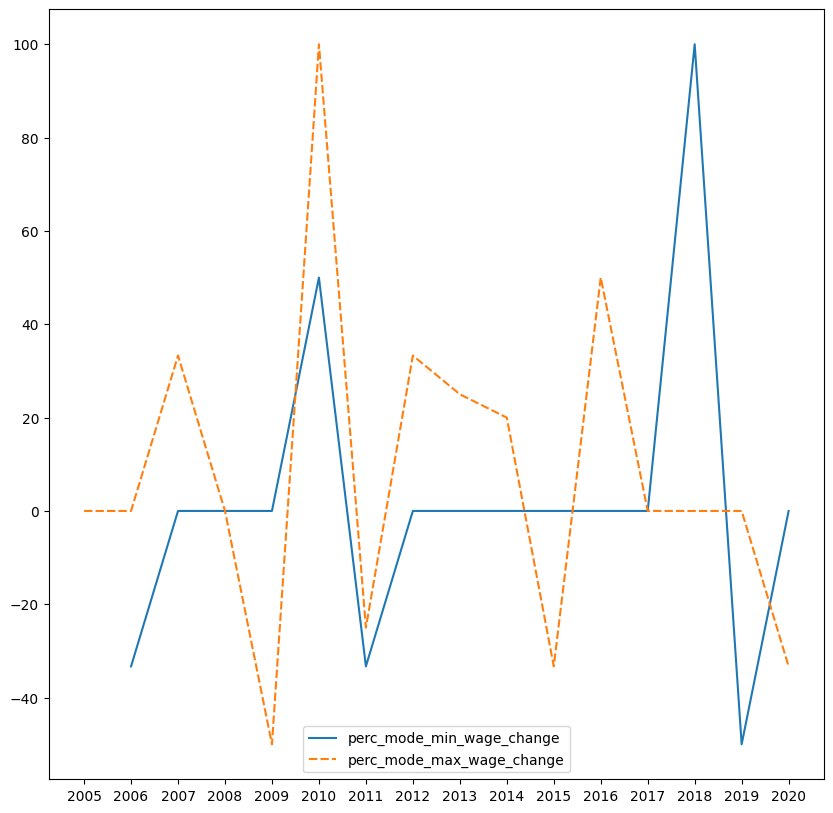

In [ ]:
visualize_lineplot(usd_sal_percente_change[['perc_mode_min_wage_change',
                                            'perc_mode_max_wage_change']])

Также снова проанализируем рублевые зарплаты:

In [ ]:
rub_data_sal_changes = get_sal_changes(2003, 2020, 'RUR')
rub_data_sal_changes

avg_min_wage  avg_max_wage  avg_wage  median_min_wage  median_max_wage  \
2003           NaN           NaN       NaN              NaN              NaN   
2004           NaN           NaN       NaN              NaN              NaN   
2005           NaN           NaN       NaN              NaN              NaN   
2006           NaN           NaN       NaN              NaN              NaN   
2007       33985.0       45070.0   39528.0          30000.0          40000.0   
2008       38290.0       51291.0   44790.0          32000.0          45000.0   
2009       35538.0       51148.0   43343.0          30000.0          45000.0   
2010       36946.0       52577.0   44762.0          30000.0          45000.0   
2011       39678.0       57470.0   48574.0          32500.0          50000.0   
2012       40467.0       58982.0   49724.0          32000.0          50000.0   
2013       40540.0       57938.0   49239.0          30000.0          50000.0   
2014       41553.0       62470.0   52012.0          35000.0          50000.0   
2015       43497.0       63572.0   53534.0          35000.0          50000.0   
2016       47265.0       83200.0   65232.0          35000.0          55000.0   
2017       50791.0       75129.0   62960.0          40000.0          60000.0   
2018       53880.0       79349.0   66614.0          40000.0          60000.0   
2019       57953.0       86282.0   72118.0          50000.0          70000.0   
2020       61637.0       93849.0   77743.0          50000.0          75000.0   

      mode_min_wage  mode_max_wage  
2003            NaN            NaN  
2004            NaN            NaN  
2005            NaN            NaN  
2006            NaN            NaN  
2007        20000.0        40000.0  
2008        30000.0        60000.0  
2009        30000.0        50000.0  
2010        30000.0        50000.0  
2011        30000.0        50000.0  
2012        30000.0        50000.0  
2013        30000.0        50000.0  
2014        30000.0        50000.0  
2015        30000.0        50000.0  
2016        30000.0        50000.0  
2017        30000.0        50000.0  
2018        30000.0        50000.0  
2019        40000.0        50000.0  
2020        40000.0       100000.0

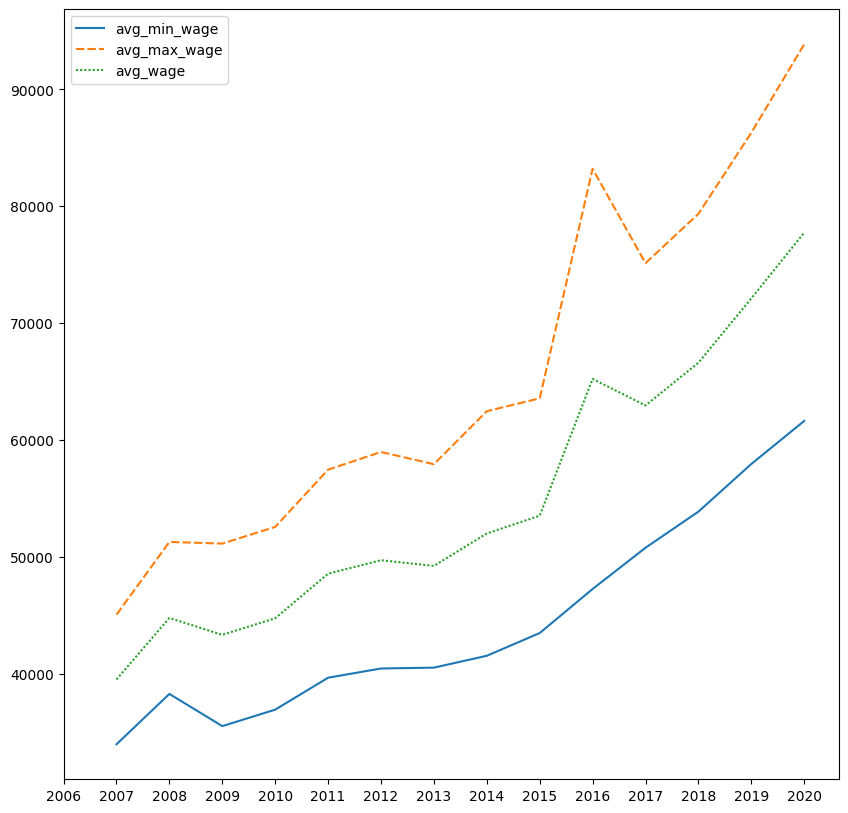

In [ ]:
visualize_lineplot(rub_data_sal_changes[['avg_min_wage', 'avg_max_wage', 'avg_wage']][3:])

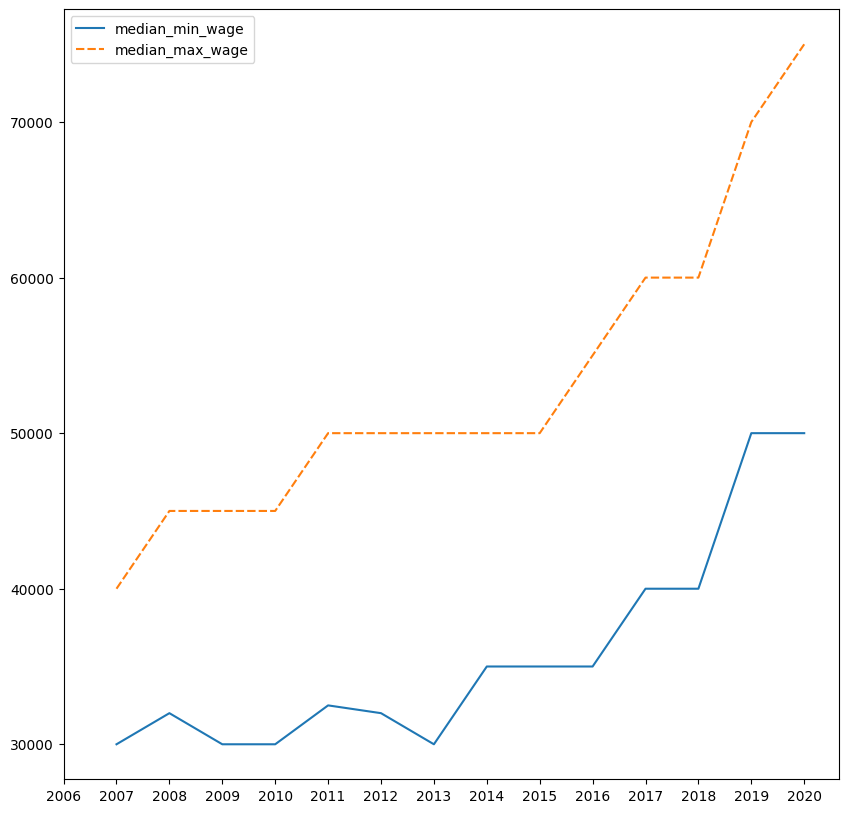

In [ ]:
visualize_lineplot(rub_data_sal_changes[['median_min_wage', 'median_max_wage']][3:])

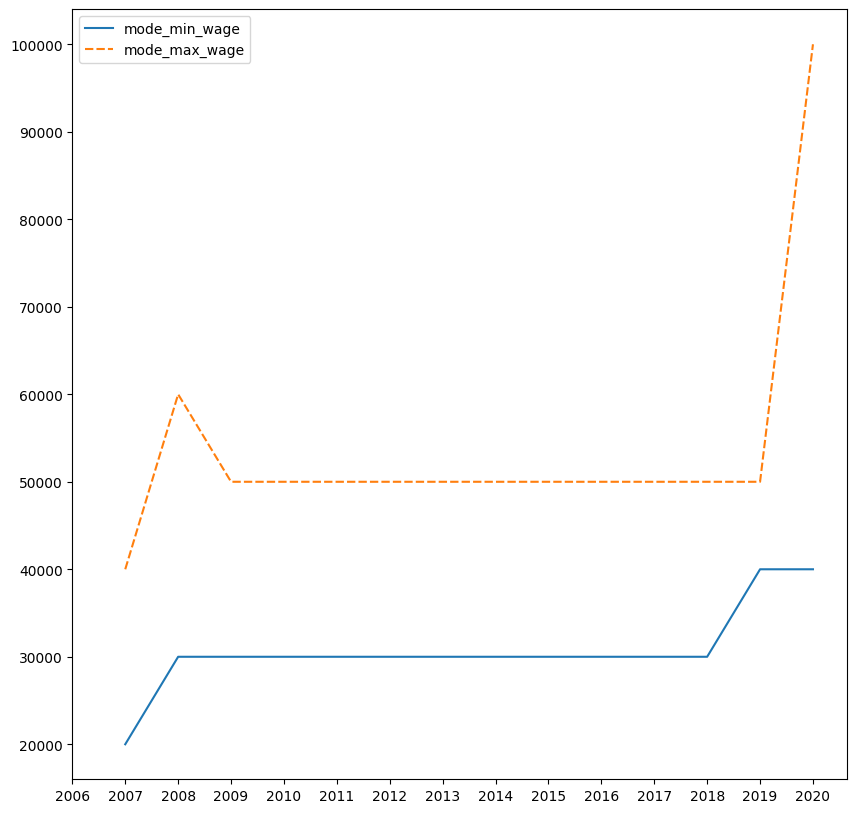

In [ ]:
visualize_lineplot(rub_data_sal_changes[['mode_min_wage', 'mode_max_wage']][3:])

Посмотрим на измененеие в процентах год к году:

In [ ]:
rub_sal_percente_change = sal_percente_change(rub_data_sal_changes)
rub_sal_percente_change

perc_avg_min_wage_change  perc_avg_max_wage_change  \
2005                       NaN                       NaN   
2006                       NaN                       NaN   
2007                       NaN                       NaN   
2008                      12.7                      13.8   
2009                      -7.2                      -0.3   
2010                       4.0                       2.8   
2011                       7.4                       9.3   
2012                       2.0                       2.6   
2013                       0.2                      -1.8   
2014                       2.5                       7.8   
2015                       4.7                       1.8   
2016                       8.7                      30.9   
2017                       7.5                      -9.7   
2018                       6.1                       5.6   
2019                       7.6                       8.7   
2020                       6.4                       8.8   

      perc_avg_wage_change  perc_median_min_wage_change  \
2005                   NaN                          NaN   
2006                   NaN                          NaN   
2007                   NaN                          NaN   
2008                  13.3                          6.7   
2009                  -3.2                         -6.2   
2010                   3.3                          0.0   
2011                   8.5                          8.3   
2012                   2.4                         -1.5   
2013                  -1.0                         -6.2   
2014                   5.6                         16.7   
2015                   2.9                          0.0   
2016                  21.9                          0.0   
2017                  -3.5                         14.3   
2018                   5.8                          0.0   
2019                   8.3                         25.0   
2020                   7.8                          0.0   

      perc_median_max_wage_change  perc_mode_min_wage_change  \
2005                          NaN                        NaN   
2006                          NaN                        NaN   
2007                          NaN                        NaN   
2008                         12.5                       50.0   
2009                          0.0                        0.0   
2010                          0.0                        0.0   
2011                         11.1                        0.0   
2012                          0.0                        0.0   
2013                          0.0                        0.0   
2014                          0.0                        0.0   
2015                          0.0                        0.0   
2016                         10.0                        0.0   
2017                          9.1                        0.0   
2018                          0.0                        0.0   
2019                         16.7                       33.3   
2020                          7.1                        0.0   

      perc_mode_max_wage_change  
2005                        NaN  
2006                        NaN  
2007                        NaN  
2008                       50.0  
2009                      -16.7  
2010                        0.0  
2011                        0.0  
2012                        0.0  
2013                        0.0  
2014                        0.0  
2015                        0.0  
2016                        0.0  
2017                        0.0  
2018                        0.0  
2019                        0.0  
2020                      100.0

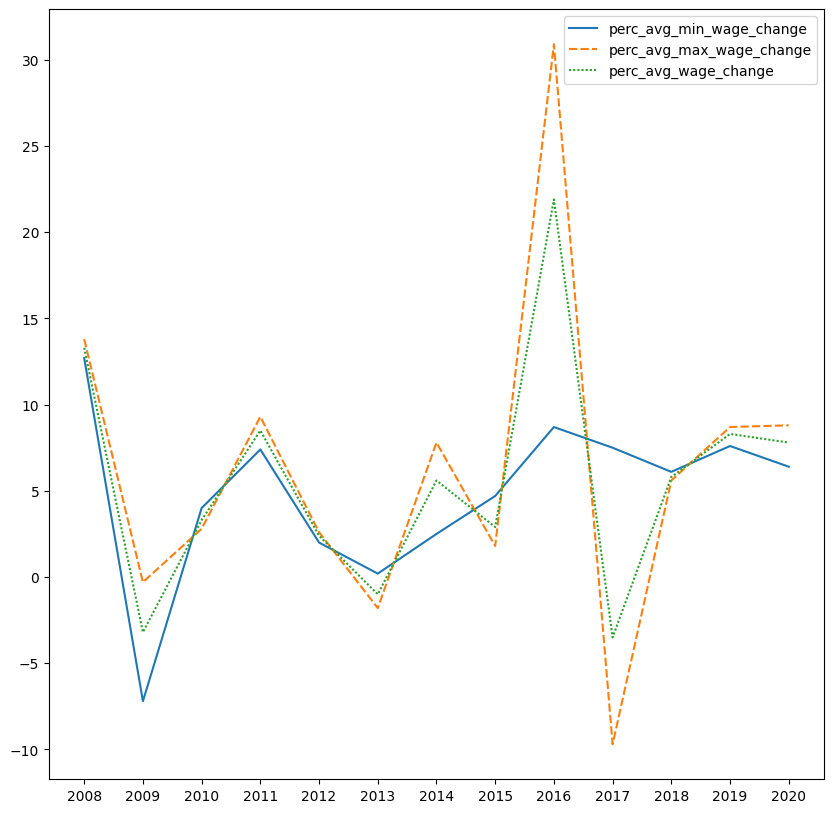

In [ ]:
visualize_lineplot(rub_sal_percente_change[['perc_avg_min_wage_change',
                                            'perc_avg_max_wage_change',
                                            'perc_avg_wage_change']][3:])

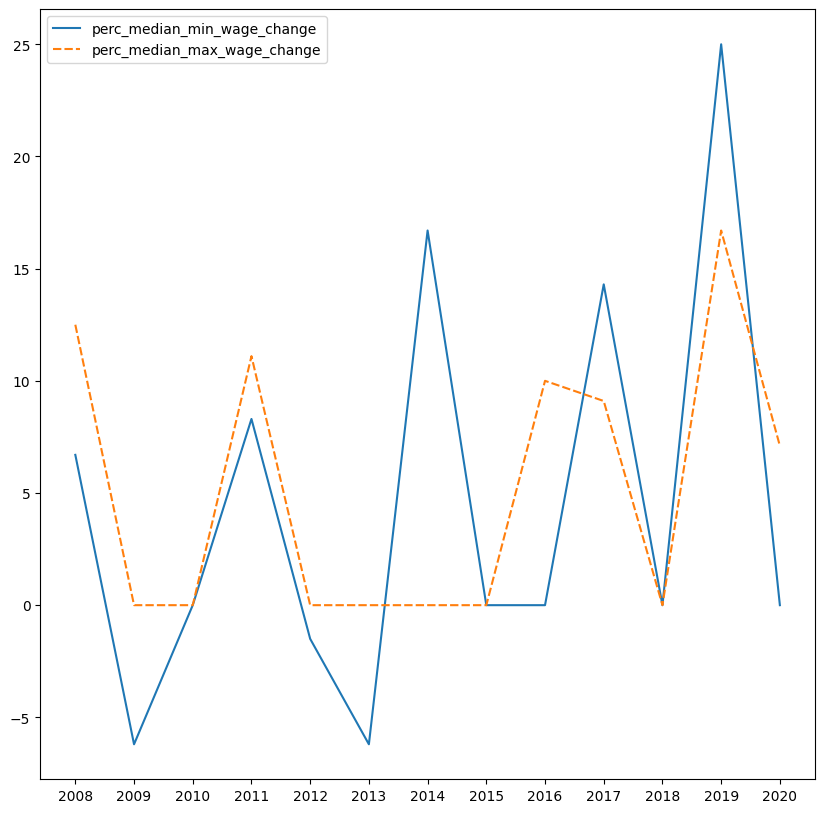

In [ ]:
visualize_lineplot(rub_sal_percente_change[['perc_median_min_wage_change',
                                            'perc_median_max_wage_change']][3:])

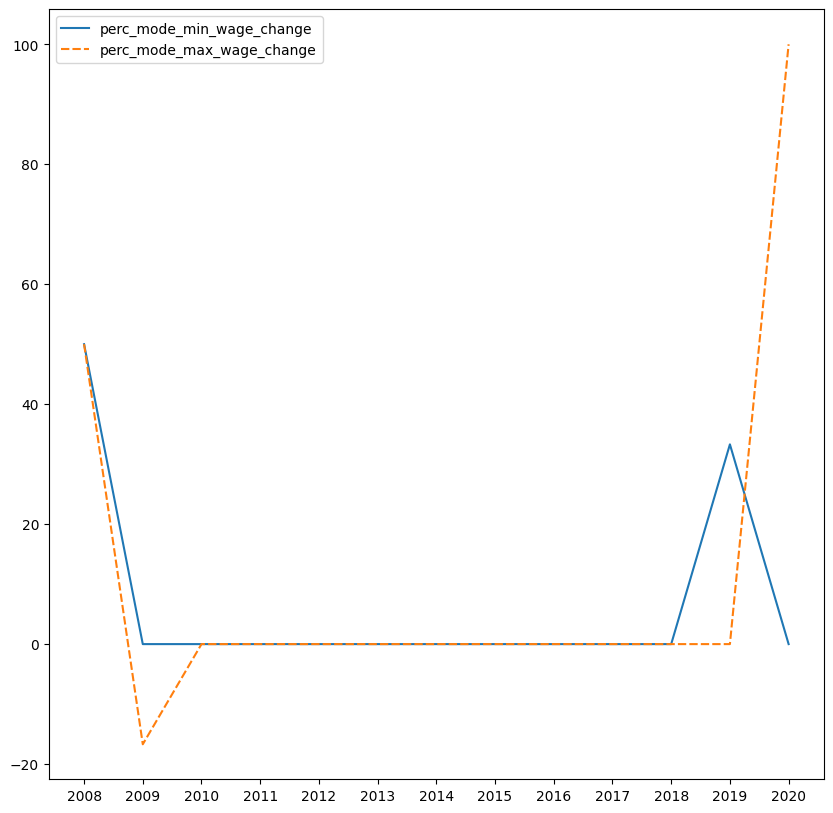

In [ ]:
visualize_lineplot(rub_sal_percente_change[['perc_mode_min_wage_change',
                                            'perc_mode_max_wage_change']][3:])

## 2.4 Изменение процента вакансий допускающих удаленку

In [ ]:
use_columns = ['schedule_id',	'schedule_name']

df = get_df(2020, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   schedule_id    587637 non-null  object
 1   schedule_name  587637 non-null  object
dtypes: object(2)
memory usage: 9.0+ MB
None


schedule_id  schedule_name
286716     fullDay    Полный день
517528     fullDay    Полный день
475096     fullDay    Полный день
16094      fullDay    Полный день
55272     flexible  Гибкий график

Посмотрим, есть ли в данных разница между id и значением:

In [ ]:
df[['schedule_id',	'schedule_name']].drop_duplicates()

schedule_id     schedule_name
0       fullDay       Полный день
2        remote  Удаленная работа
16     flexible     Гибкий график
33        shift    Сменный график
70  flyInFlyOut    Вахтовый метод

Разхождений нет.

Очевидно, что удаленная работа подразумевается в вакансиях с id remote, но также, возможно, удаленная работа допускается в вакансиях с id flexible. Посмотрим на такие вакансии и проверим:

In [ ]:
use_columns = ['description', 'key_skills', 'specializations', 'schedule_id',
               'name', 'prof_classes_found', 'terms_found']

df = get_df(2017, use_columns)

In [ ]:
df.loc[df.schedule_id == 'flexible'].sample(5)

description  \
361976  <p><strong>АО ЭР-Телеком Холдинг — федеральный...   
44181   <p><strong>Обязанности</strong>:</p> <ul> <li>...   
268617  <strong>Профессиональные требования:</strong> ...   
43387   <p>ЕСТЬ РАБОТА!</p> <p>Любишь общение?<br />Ве...   
344674  <p><strong><em>Описание вакансии:</em></strong...   

                                               key_skills schedule_id  \
361976                                                NaN    flexible   
44181   Python\nJavaScript\nHTML\nGit\nCSS\njQuery\nBa...    flexible   
268617                                                NaN    flexible   
43387                                                 NaN    flexible   
344674                                                NaN    flexible   

                                          specializations  \
361976  17.256 Розничная торговля 17 Продажи\n17.535 Т...   
44181   1.221 Программирование, Разработка 1 Информаци...   
268617  17.269 Телекоммуникации, Сетевые решения 17 Пр...   
43387   1.225 Продажи 1 Информационные технологии, инт...   
344674  1.161 Мультимедиа 1 Информационные технологии,...   

                                              name prof_classes_found  \
361976                        Продавец-консультант          prodajnik   
44181                              Web-разработчик         programmer   
268617  Менеджер по продажам (агент прямых продаж)          prodajnik   
43387                       Специалист по продажам          prodajnik   
344674               Консультант по решениям Apple         consultant   

                                              terms_found  
361976                                доход гибкий_график  
44181   bash python css django английский_язык отчётно...  
268617  желание_работать менеджер_по_продажам гибкий_г...  
43387           официальное_трудоустройство гибкий_график  
344674  гибкий_график руководство навыки_презентации в...

Видно, что это вакансии в it, где возможна удаленная работа, поэтому также включим их в анализ.

Посмотри на общее изменение общего количества вакансий, в которых возможна удаленная работа:

In [ ]:
def get_vac_with_remote(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['key_skills',
                  'schedule_id',
                  'experience_id',
                  'employer_id',
                  'name',
                  'salary_gross', 'salary_currency'])
    df_remote = df[df.schedule_id == 'remote']

    grouped = df_remote.groupby(['key_skills',
                              'schedule_id',
                              'experience_id',
                              'employer_id',
                              'name',
                              'salary_gross', 'salary_currency'],
                                as_index=False).mean()

    remote_vac = len(grouped)
    flexible_vac = len(df[df.schedule_id == 'flexible'])

    show_data = pd.DataFrame({'num_remote_vac': remote_vac,
                              'num_flexible_vac': flexible_vac,
                              'num_vac_allow_remote': remote_vac + flexible_vac},
                             index=[year])
    data = pd.concat([data, show_data])

  return data

In [ ]:
vac_with_remote = get_vac_with_remote(2003, 2020)
vac_with_remote

num_remote_vac  num_flexible_vac  num_vac_allow_remote
2003               0                 0                     0
2004               0                 0                     0
2005               0                 0                     0
2006               0                 0                     0
2007               0                 0                     0
2008               0                 1                     1
2009               0                42                    42
2010               0              2542                  2542
2011               0              6454                  6454
2012               0             11318                 11318
2013               0             17153                 17153
2014               0             25626                 25626
2015               0             25295                 25295
2016               0             29396                 29396
2017            3161             25164                 28325
2018            7948             32104                 40052
2019            8979             35124                 44103
2020           19793             38095                 57888

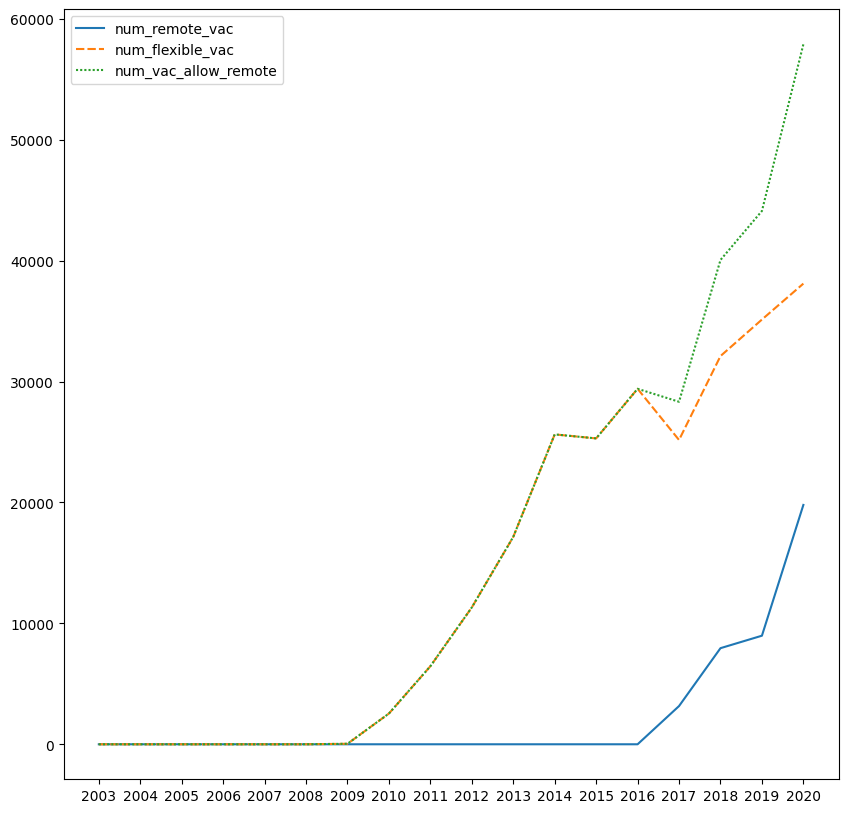

In [ ]:
visualize_lineplot(vac_with_remote)

Теперь посмотрим на то, как менялся процент вакансий, допускающих удаленку:

In [ ]:
def get_percente_vac_with_remote(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['key_skills',
                  'schedule_id',
                  'experience_id',
                  'employer_id',
                  'name',
                  'salary_gross', 'salary_currency'])
    df_remote = df[df.schedule_id == 'remote']
    df_non_remote = df[df.schedule_id != 'remote']
    grouped = df_remote.groupby(['key_skills',
                              'schedule_id',
                              'experience_id',
                              'employer_id',
                              'name',
                              'salary_gross', 'salary_currency'],
                                as_index=False).mean()
    df = pd.concat([df_non_remote, grouped], ignore_index=True)
    remote_vac = round((len(grouped) / len(df)) * 100)
    flexible_vac = round((len(df[df.schedule_id == 'flexible']) / len(df)) * 100)

    show_data = pd.DataFrame({'percent_remote_vac': remote_vac,
                              'percent_flexible_vac': flexible_vac,
                              'percent_vac_allow_remote': remote_vac + flexible_vac},
                             index=[year])
    data = pd.concat([data, show_data])

  return data

In [ ]:
percente_vac_with_remote = get_percente_vac_with_remote(2003, 2020)
percente_vac_with_remote

percent_remote_vac  percent_flexible_vac  percent_vac_allow_remote
2003                   0                     0                         0
2004                   0                     0                         0
2005                   0                     0                         0
2006                   0                     0                         0
2007                   0                     0                         0
2008                   0                     0                         0
2009                   0                     0                         0
2010                   0                     3                         3
2011                   0                     5                         5
2012                   0                     7                         7
2013                   0                     8                         8
2014                   0                    10                        10
2015                   0                    10                        10
2016                   0                    10                        10
2017                   1                     7                         8
2018                   2                     7                         9
2019                   2                     7                         9
2020                   4                     7                        11

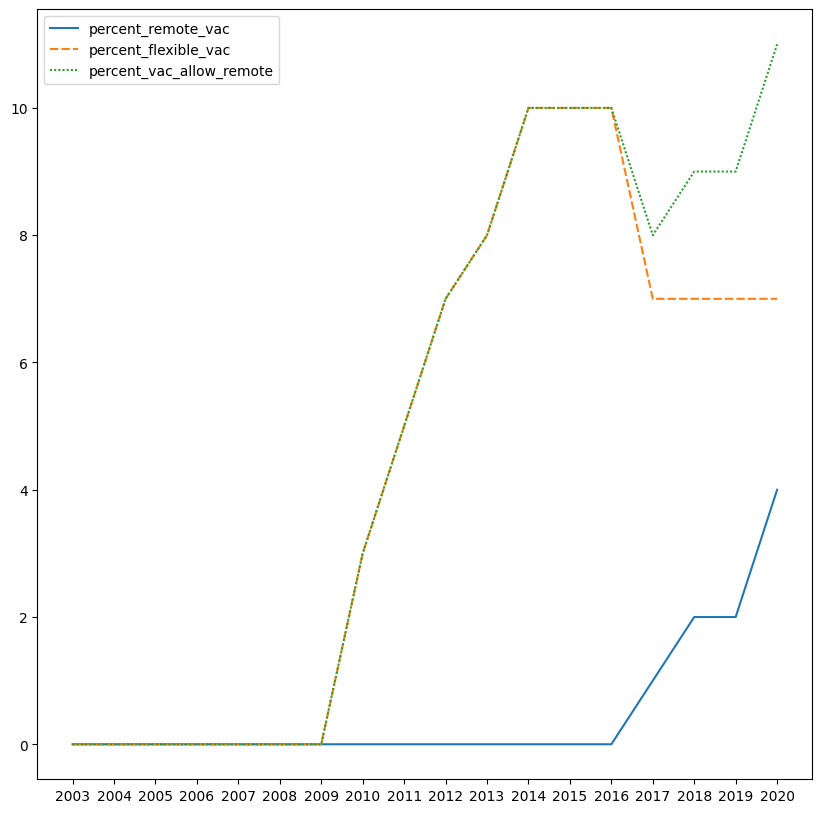

In [ ]:
visualize_lineplot(percente_vac_with_remote)

## 2.5 Изменение процента вакансий допускающих работу людей с инвалидностью

In [ ]:
use_columns = ['accept_handicapped']

df = get_df(2020, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   accept_handicapped  587637 non-null  bool 
dtypes: bool(1)
memory usage: 574.0 KB
None


accept_handicapped
472912               False
511606               False
287221               False
203560               False
108914               False

In [ ]:
df.accept_handicapped.unique()

array([False,  True])

Сначала посмотрим на абсолютное количество таких вакансий:

In [ ]:
def get_vac_accept_handicapped(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['accept_handicapped'])
    accept_handicapped = len(df[df.accept_handicapped == True])

    show_data = pd.DataFrame({'accept_handicapped': accept_handicapped},
                             index=[year])
    data = pd.concat([data, show_data])

  return data

In [ ]:
vac_accept_handicapped = get_vac_accept_handicapped(2003, 2020)
vac_accept_handicapped

accept_handicapped
2003                   0
2004                   0
2005                   0
2006                   0
2007                   0
2008                   0
2009                   0
2010                   0
2011                   2
2012                 399
2013                3951
2014               24189
2015               39090
2016               30558
2017               16510
2018               14316
2019               16698
2020               25012

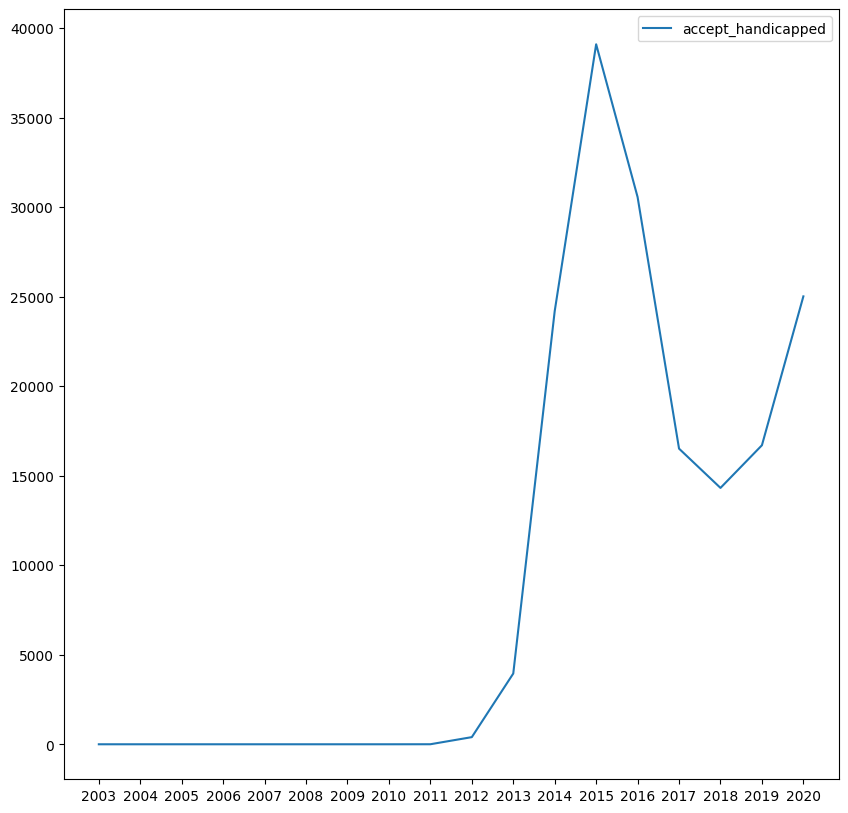

In [ ]:
visualize_lineplot(vac_accept_handicapped)

Теперь посмотрим на процент соответствующий вакансий:

In [ ]:
def get_percent_vac_accept_handicapped(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['accept_handicapped'])
    percent_accept_handicapped = round((len(df[df.accept_handicapped == True])) / len(df) * 100)

    show_data = pd.DataFrame({'percent_accept_handicapped': percent_accept_handicapped},
                             index=[year])
    data = pd.concat([data, show_data])

  return data

In [ ]:
percent_vac_accept_handicapped = get_percent_vac_accept_handicapped(2003, 2020)
percent_vac_accept_handicapped

percent_accept_handicapped
2003                           0
2004                           0
2005                           0
2006                           0
2007                           0
2008                           0
2009                           0
2010                           0
2011                           0
2012                           0
2013                           2
2014                           9
2015                          14
2016                           9
2017                           4
2018                           3
2019                           3
2020                           4

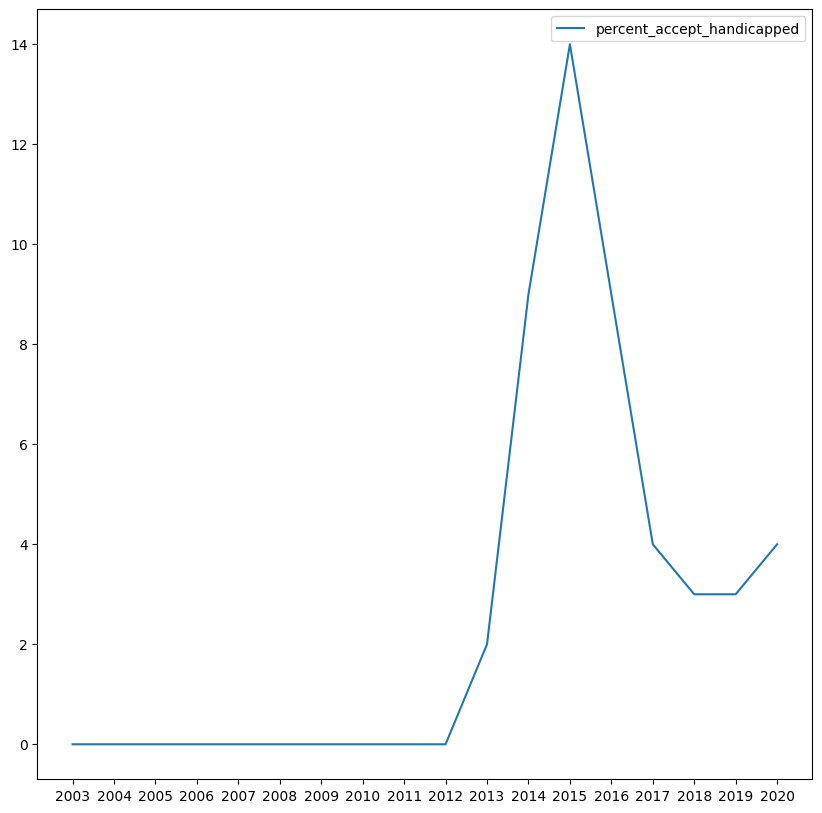

In [ ]:
visualize_lineplot(percent_vac_accept_handicapped)

## 2.6 Изменение распределения зарплатных валют

In [ ]:
use_columns = ['salary_currency']

df = get_df(2015, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284763 entries, 0 to 284762
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   salary_currency  147698 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB
None


salary_currency
153019             RUR
10937              RUR
59886              RUR
81766              RUR
107533             RUR

Посмотрим на валюты:

In [ ]:
df.salary_currency.unique()

array([nan, 'RUR', 'KZT', 'BYR', 'USD', 'EUR', 'UAH', 'AZN', 'UZS', 'KGS',
       'GEL'], dtype=object)

Посмотрим на абсолютное количество вакансий с разными валютами:

In [ ]:
def get_currency_distribution(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['salary_currency'])
    values_list = list(filter(lambda val: isinstance(val, str), df.salary_currency.values))
    count_values = Counter(values_list)
    data = pd.concat([data, pd.DataFrame(count_values, index=[year])])

  return data

In [ ]:
currency_data = get_currency_distribution(2003, 2020)
currency_data

USD       RUR     EUR      KZT     UAH     BYR    AZN     UZS    KGS  \
2003   1070       NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
2004   4322       NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
2005   9364       NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
2006  23057       NaN     NaN      NaN     NaN     NaN    NaN     NaN    NaN   
2007  31607    3590.0    88.0     44.0    12.0     NaN    NaN     NaN    NaN   
2008  18234   27866.0   345.0    122.0    90.0     NaN    NaN     NaN    NaN   
2009   3789   26640.0   203.0    242.0   207.0     NaN    NaN     NaN    NaN   
2010   3276   47294.0   254.0    571.0   284.0     7.0    NaN     NaN    NaN   
2011   6928   67575.0   251.0   1050.0   825.0   784.0    NaN     NaN    NaN   
2012   6478   84415.0   189.0   1821.0  1000.0  1234.0   10.0     NaN    NaN   
2013   8351  114219.0   623.0   2769.0  1937.0  1539.0   34.0     NaN    NaN   
2014   6748  124891.0   397.0   4629.0  2500.0  2274.0   42.0     NaN    NaN   
2015   4680  130697.0   617.0   5158.0  3333.0  3123.0   57.0    24.0    8.0   
2016   5312  156505.0   846.0   6369.0  3796.0  4423.0   71.0    71.0   35.0   
2017   6659  177717.0  1078.0   8779.0  3556.0  5767.0   46.0   151.0   37.0   
2018   8882  251827.0  1505.0  10254.0  3420.0  7029.0  144.0   437.0  184.0   
2019   7004  237696.0  1934.0   9817.0  2671.0  6877.0   83.0   673.0  148.0   
2020   7482  257272.0  1457.0   9754.0  1914.0  5919.0   31.0  1044.0  134.0   

       GEL  
2003   NaN  
2004   NaN  
2005   NaN  
2006   NaN  
2007   NaN  
2008   NaN  
2009   NaN  
2010   NaN  
2011   NaN  
2012   NaN  
2013   NaN  
2014   NaN  
2015   1.0  
2016   3.0  
2017   1.0  
2018   6.0  
2019  15.0  
2020   7.0

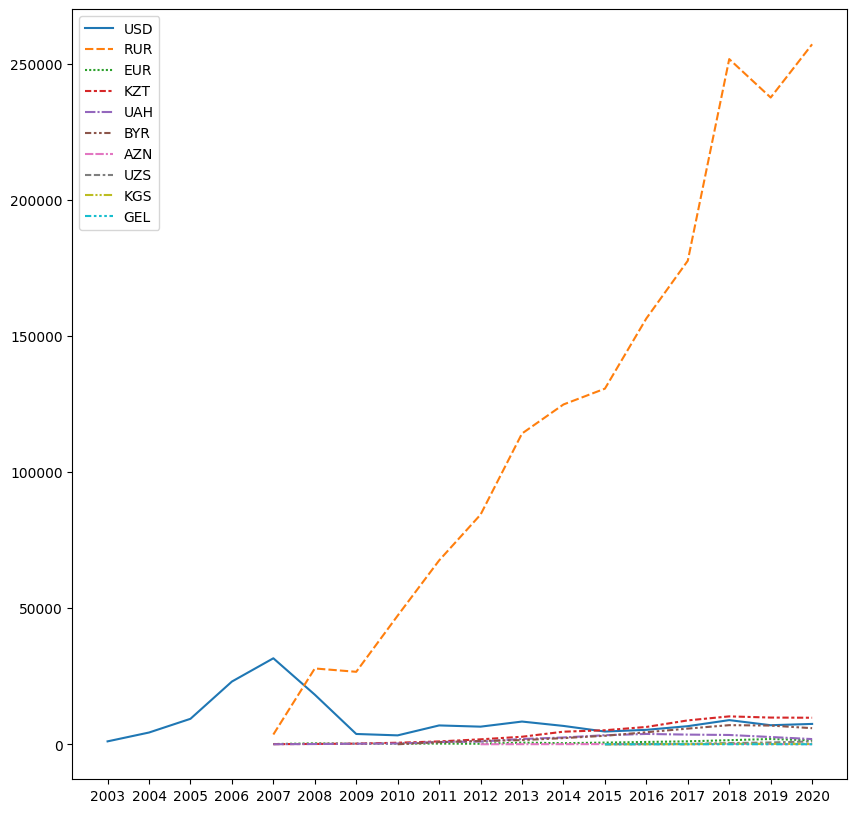

In [ ]:
visualize_lineplot(currency_data)

Теперь посмотрим на изменение долей валют в общем количестве вакансий с указанной валютой:

In [ ]:
def get_percente_currency_distribution(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['salary_currency'])
    values_list = list(filter(lambda val: isinstance(val, str), df.salary_currency.values))
    count_values = Counter(values_list)
    num_vac_with_curr = len(df[df.salary_currency.notna()])
    for curr, curr_num in count_values.items():
      count_values[curr] = round((curr_num / num_vac_with_curr) * 100)

    data = pd.concat([data, pd.DataFrame(count_values, index=[year])])

  return data

In [ ]:
get_percente_currency_distribution(2003, 2003)

1070
('USD', 1070)


In [ ]:
percente_currency_data = get_percente_currency_distribution(2003, 2020)
percente_currency_data

USD   RUR  EUR  KZT  UAH  BYR  AZN  UZS  KGS  GEL
2003  100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004  100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005  100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006  100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2007   89  10.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN
2008   39  60.0  1.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN
2009   12  86.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN
2010    6  92.0  0.0  1.0  1.0  0.0  NaN  NaN  NaN  NaN
2011    9  87.0  0.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN
2012    7  89.0  0.0  2.0  1.0  1.0  0.0  NaN  NaN  NaN
2013    6  88.0  0.0  2.0  1.0  1.0  0.0  NaN  NaN  NaN
2014    5  88.0  0.0  3.0  2.0  2.0  0.0  NaN  NaN  NaN
2015    3  88.0  0.0  3.0  2.0  2.0  0.0  0.0  0.0  0.0
2016    3  88.0  0.0  4.0  2.0  2.0  0.0  0.0  0.0  0.0
2017    3  87.0  1.0  4.0  2.0  3.0  0.0  0.0  0.0  0.0
2018    3  89.0  1.0  4.0  1.0  2.0  0.0  0.0  0.0  0.0
2019    3  89.0  1.0  4.0  1.0  3.0  0.0  0.0  0.0  0.0
2020    3  90.0  1.0  3.0  1.0  2.0  0.0  0.0  0.0  0.0

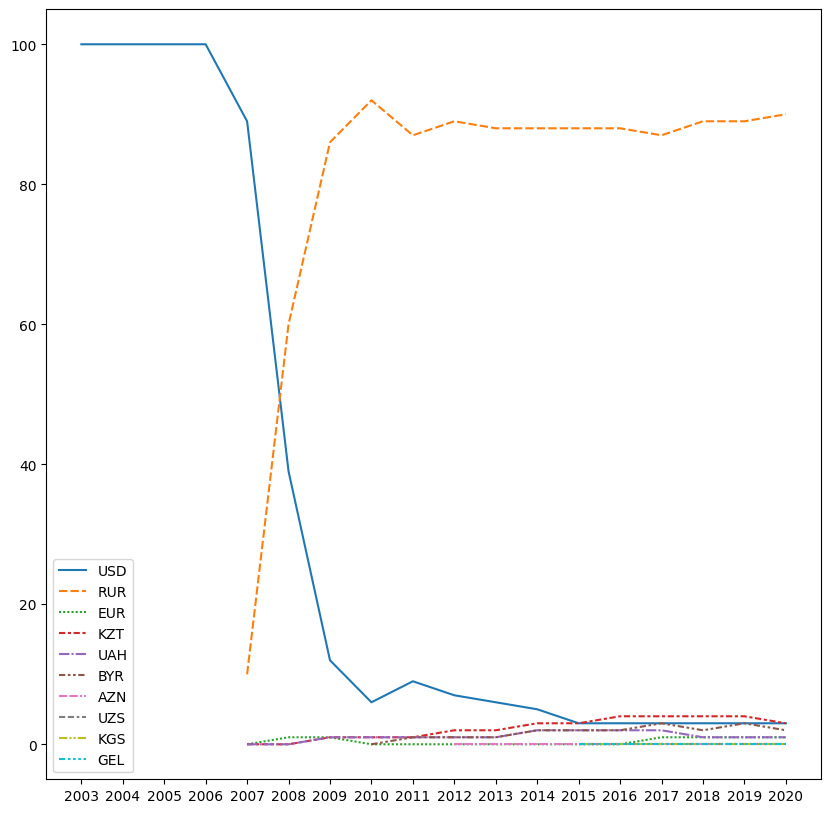

In [ ]:
visualize_lineplot(percente_currency_data)

## 2.7 Топ-10 городов размещения вакансий (вообще и в IT)

In [ ]:
use_columns = ['key_skills',
               'schedule_id',
               'area_name',
               'prof_classes_found']

df = get_df(2016, use_columns)
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332460 entries, 0 to 332459
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   key_skills          81745 non-null   object
 1   schedule_id         332460 non-null  object
 2   area_name           332460 non-null  object
 3   prof_classes_found  326727 non-null  object
dtypes: object(4)
memory usage: 10.1+ MB
None


key_skills schedule_id  \
268126                                                NaN     fullDay   
43010   PHP\nCSS3\nCSS\nMySQL\nPHP5\nООП\nCMS Wordpres...      remote   
58592                                                 NaN    flexible   
249806                                                NaN     fullDay   
261682                                                NaN     fullDay   

               area_name prof_classes_found  
268126            Москва             tester  
43010   Великий Новгород         programmer  
58592        Новокузнецк         specialist  
249806              Тула            support  
261682       Новосибирск         programmer

Рассмотрим только вакансии без удаленки:

In [ ]:
def get_top_locations(start_year, finish_year, num_top):

  data = pd.DataFrame()
  all_count_values = Counter()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['schedule_id', 'area_name'])
    df = df[df.schedule_id != 'remote']
    values_list = list(filter(lambda val: isinstance(val, str), df.area_name.values))
    try:
      count_values = Counter(values_list)
      data = pd.concat([data, pd.DataFrame(count_values, index=[year])])
      all_count_values += count_values
    except Exception:
      continue
  top_locations = dict(all_count_values.most_common(num_top)).keys()

  return data[top_locations]

In [ ]:
top_locations = get_top_locations(2003, 2020, 10)
top_locations

Москва  Санкт-Петербург    Минск     Киев  Новосибирск  Нижний Новгород  \
2003    1778              137      NaN      NaN            3               40   
2004    7186              371      NaN      NaN           18               92   
2005   13455              692      NaN    543.0           91              194   
2006   26535             2006      NaN   1415.0          176              188   
2007   36003             4946      NaN   2229.0          843             1146   
2008   44063             9497      NaN   4438.0          808             1842   
2009   27872             7553    113.0   2041.0          513             1189   
2010   50243            12495   1172.0   2933.0         1107             2057   
2011   63600            15224   6971.0   6560.0         2133             3508   
2012   72171            17764   8455.0   7379.0         3322             4103   
2013   80439            19746   9682.0   9249.0         4518             5042   
2014   77910            22316  11001.0   9518.0         4984             4962   
2015   68967            23772   9645.0  11912.0         5467             5489   
2016   84988            32380  12749.0  14633.0         7156             6363   
2017  108358            38599  16833.0  13689.0         9084             7293   
2018  136063            46099  22069.0  13046.0        12472            10072   
2019  157273            53215  23853.0  10235.0        13949            10684   
2020  160422            54280  23059.0   8323.0        14343            10781   

       Алматы  Воронеж  Екатеринбург   Казань  
2003      NaN      NaN             9      NaN  
2004      NaN      NaN            32     13.0  
2005      2.0     17.0            83     24.0  
2006    174.0     70.0           285    104.0  
2007    701.0    341.0           897    615.0  
2008   1001.0    592.0          1045   1147.0  
2009    773.0    631.0           531   1131.0  
2010   1742.0   1190.0          1081   1822.0  
2011   2616.0   1865.0          2068   2827.0  
2012   3543.0   2944.0          2970   3704.0  
2013   4386.0   6333.0          3903   4318.0  
2014   5436.0  10207.0          3894   4198.0  
2015   5533.0  12017.0          3828   4366.0  
2016   6228.0   4188.0          5088   5452.0  
2017   8362.0   5569.0          7259   6377.0  
2018   9762.0   6774.0          9531   7819.0  
2019  10183.0   7616.0         11628   9082.0  
2020   9820.0   7994.0         13223  10261.0

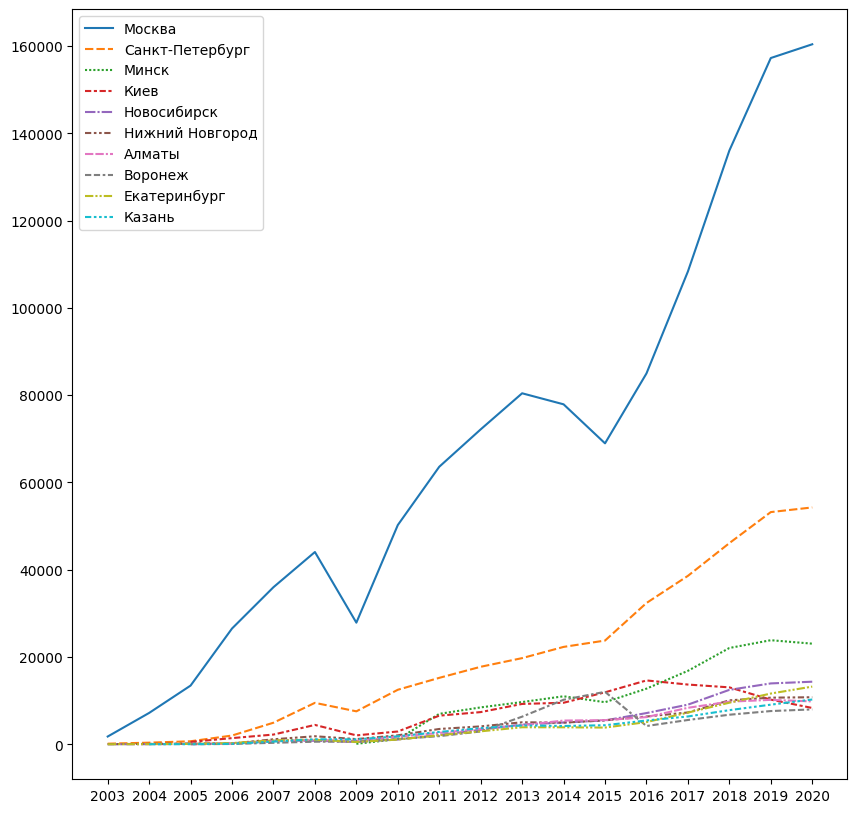

In [ ]:
visualize_lineplot(top_locations)

То же без Москвы и Петербурга:

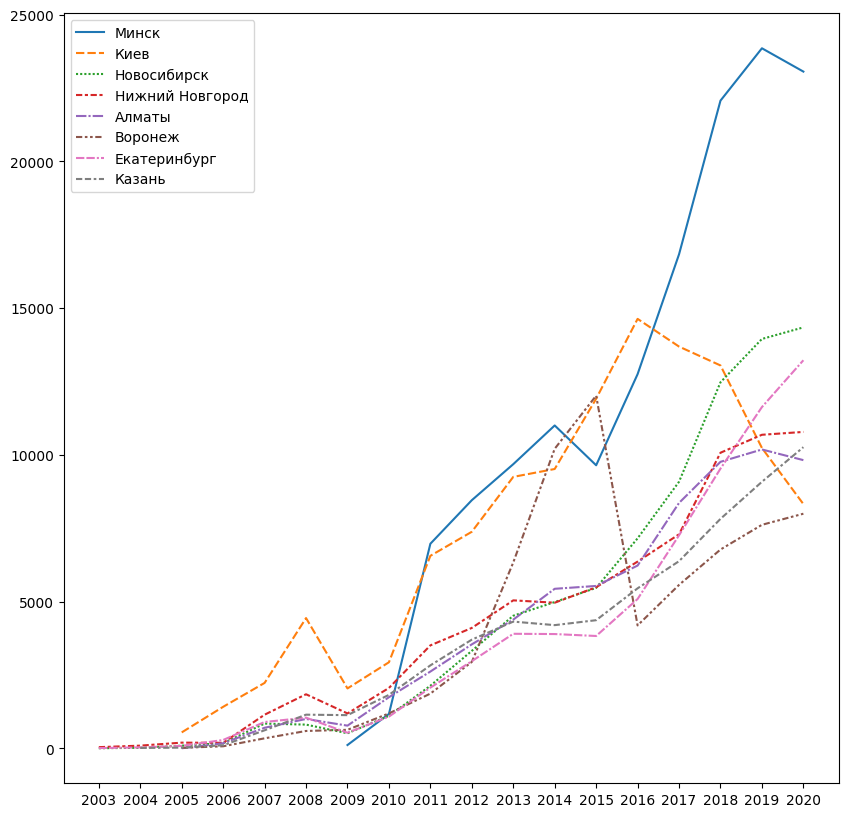

In [ ]:
visualize_lineplot(top_locations[top_locations.columns[2:]])

Посмотрим самые популярные города в отношении IT специальностей. Для этого соберем ключевые слова в prof_classes, относящиеся к IT:

In [ ]:
it_keys = ['tester', 'programmer', 'sysadmin', 'proj_manager',
           'it_security', 'devops', 'teamlead', 'data_scientist', 'designer',
           'machine_learner', 'web_master']

In [ ]:
def get_top_locations_for_it(start_year, finish_year, num_top, it_keys):

  data = pd.DataFrame()
  all_count_values = Counter()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['schedule_id', 'area_name', 'prof_classes_found'])
    df = df[df.schedule_id != 'remote']
    df = df[df.prof_classes_found.apply(lambda val: True if re.findall(it_key, str(val)) \
                                        else False for it_key in it_keys) \
                                          .sum(axis=1) \
                                          .apply(lambda val: True if val == 1 else False)]

    values_list = list(filter(lambda val: isinstance(val, str), df.area_name.values))
    try:
      count_values = Counter(values_list)
      data = pd.concat([data, pd.DataFrame(count_values, index=[year])])
      all_count_values += count_values
    except Exception:
      continue

  top_locations = dict(all_count_values.most_common(num_top)).keys()

  return data[top_locations]

In [ ]:
top_locations_for_it = get_top_locations_for_it(2003, 2020, 10, it_keys)
top_locations_for_it

Москва  Санкт-Петербург   Минск   Киев  Новосибирск  Нижний Новгород  \
2003      46                3     NaN    NaN          NaN                1   
2004     207                9     NaN    NaN          NaN                4   
2005     329               30     NaN   24.0          2.0               11   
2006     845               89     NaN   61.0          9.0               11   
2007     950              249     NaN   85.0         21.0               47   
2008    1058              450     NaN  135.0         20.0               70   
2009     581              365    10.0   88.0         26.0               33   
2010    1245              641   111.0  160.0         31.0               75   
2011    1618              799   473.0  399.0         94.0              113   
2012    1866              885   521.0  441.0        139.0              137   
2013    1980              984   590.0  641.0        171.0              181   
2014    2026             1177   744.0  654.0        286.0              235   
2015    2196             1409   625.0  812.0        409.0              380   
2016    3067             1941   758.0  978.0        389.0              303   
2017    3638             2059  1107.0  937.0        522.0              347   
2018    4799             2457  1443.0  695.0        613.0              531   
2019    6405             3069  1619.0  441.0        713.0              594   
2020    7740             3569  1576.0  423.0        810.0              593   

      Воронеж  Екатеринбург  Казань  Самара  
2003      NaN           NaN     NaN     NaN  
2004      NaN           NaN     NaN     NaN  
2005      1.0           1.0     1.0     1.0  
2006      NaN           2.0     4.0     9.0  
2007      5.0           3.0     4.0     9.0  
2008     14.0          10.0    10.0    15.0  
2009      5.0           5.0     8.0    40.0  
2010     26.0          14.0    19.0    45.0  
2011     64.0          33.0    45.0    62.0  
2012    116.0          36.0    75.0    73.0  
2013    388.0          77.0    91.0    83.0  
2014    784.0          80.0    85.0   109.0  
2015    932.0         119.0   105.0   204.0  
2016    182.0         174.0   171.0   170.0  
2017    199.0         252.0   229.0   175.0  
2018    234.0         341.0   306.0   237.0  
2019    282.0         397.0   378.0   238.0  
2020    352.0         534.0   509.0   384.0

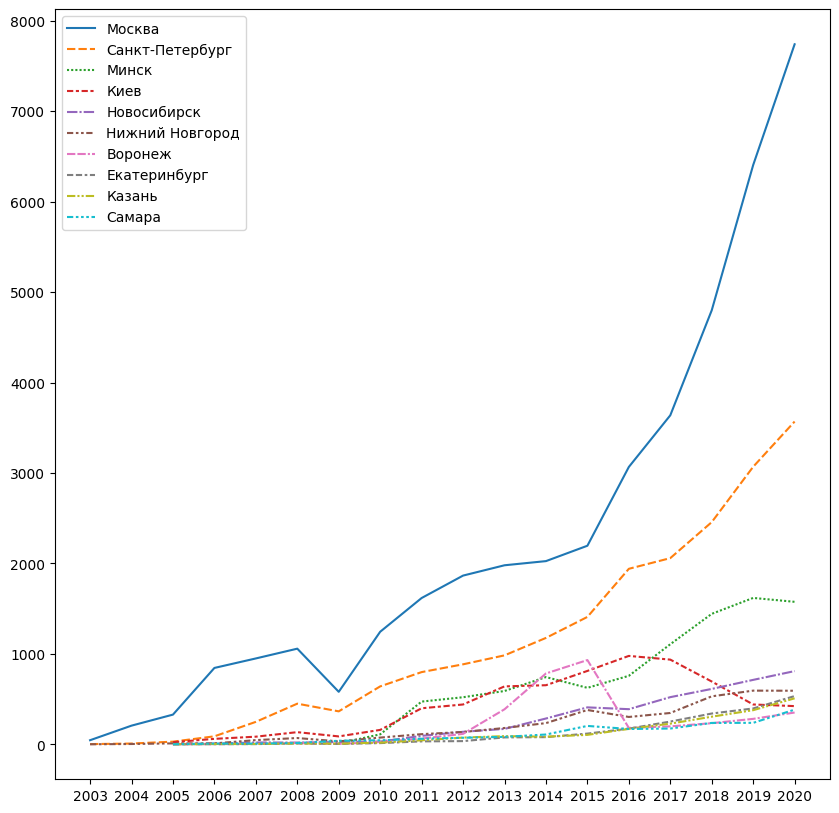

In [ ]:
visualize_lineplot(top_locations_for_it)

То же без Москвы и Петербурга:

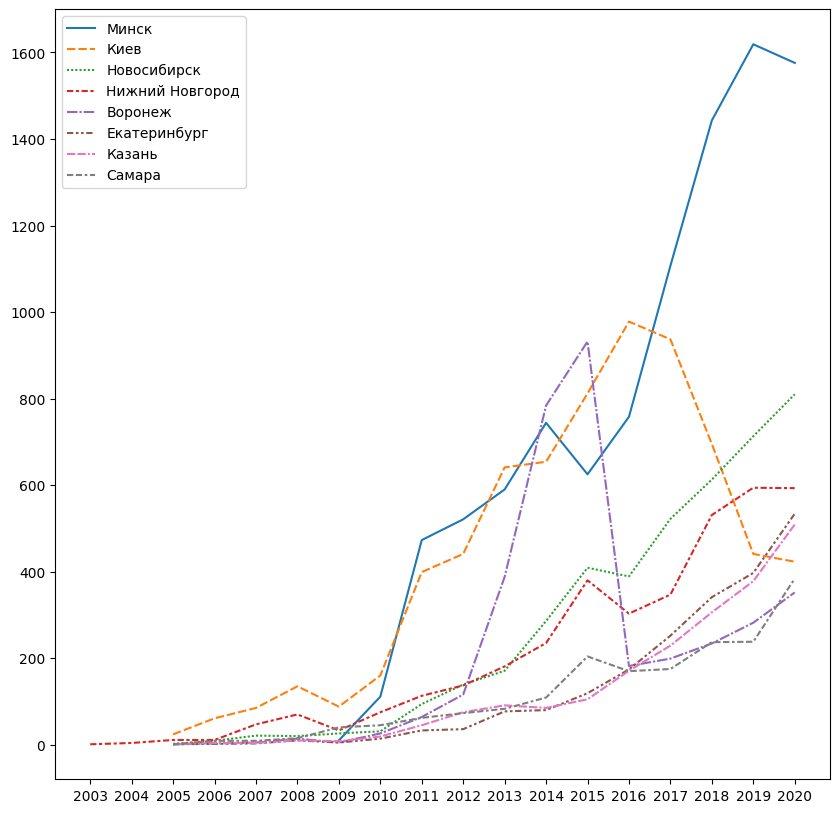

In [ ]:
visualize_lineplot(top_locations_for_it[top_locations_for_it.columns[2:]])

## 2.8 Действительно важное - в каком количестве вакансий обещают печеньки

Посмотрим в description и в terms_found:

In [ ]:
def find_pechenki(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['description', 'schedule_id', 'terms_found'])
    df = df[((df.schedule_id != 'remote') \
             & (df.description.notna()) \
             & (df.terms_found.notna()))]
    num = len(df[df[['description', 'terms_found']] \
                .apply(lambda val: True if re.findall('Печень|печень', str(val)) else False, axis=1)])

    data = pd.concat([data, pd.DataFrame({'shedrie_rabotodately': num}, index = [year])])

  return data


In [ ]:
num_pechenki = find_pechenki(2003, 2020)
num_pechenki

shedrie_rabotodately
2003                     0
2004                     0
2005                     0
2006                     0
2007                     1
2008                     1
2009                     2
2010                    32
2011                    72
2012                   178
2013                   343
2014                   559
2015                   535
2016                   851
2017                   960
2018                  1077
2019                  1085
2020                   851

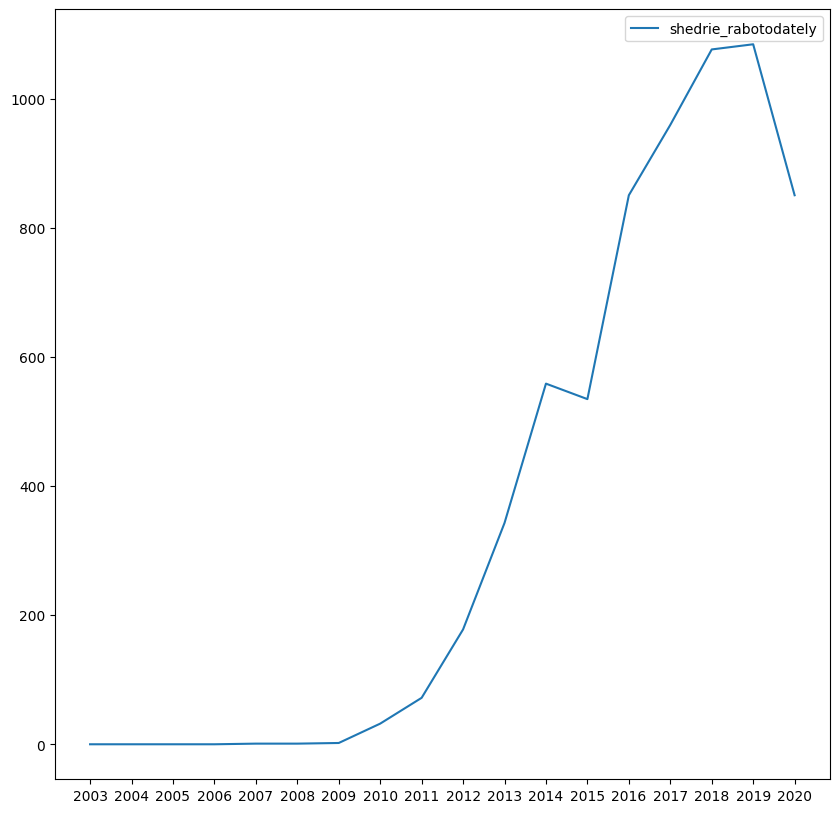

In [ ]:
visualize_lineplot(num_pechenki)

Посмотрим на изменение процента вакансий с печеньками:

In [ ]:
def find_percent_pechenki(start_year, finish_year):

  data = pd.DataFrame()
  for year in range(start_year, finish_year+1):
    df = get_df(year, ['description', 'schedule_id', 'terms_found'])
    df = df[((df.schedule_id != 'remote') \
             & (df.description.notna()) \
             & (df.terms_found.notna()))]
    num = round((len(df[df[['description', 'terms_found']] \
                .apply(lambda val: True if re.findall('Печень|печень', str(val)) else False, axis=1)]) \
                / len(df)) * 100, 2)

    data = pd.concat([data, pd.DataFrame({'shedrie_rabotodately': num}, index = [year])])

  return data

In [ ]:
num_percent_pechenki = find_percent_pechenki(2003, 2020)
num_percent_pechenki

shedrie_rabotodately
2003                  0.00
2004                  0.00
2005                  0.00
2006                  0.00
2007                  0.00
2008                  0.00
2009                  0.00
2010                  0.03
2011                  0.05
2012                  0.11
2013                  0.16
2014                  0.23
2015                  0.21
2016                  0.28
2017                  0.27
2018                  0.23
2019                  0.22
2020                  0.17

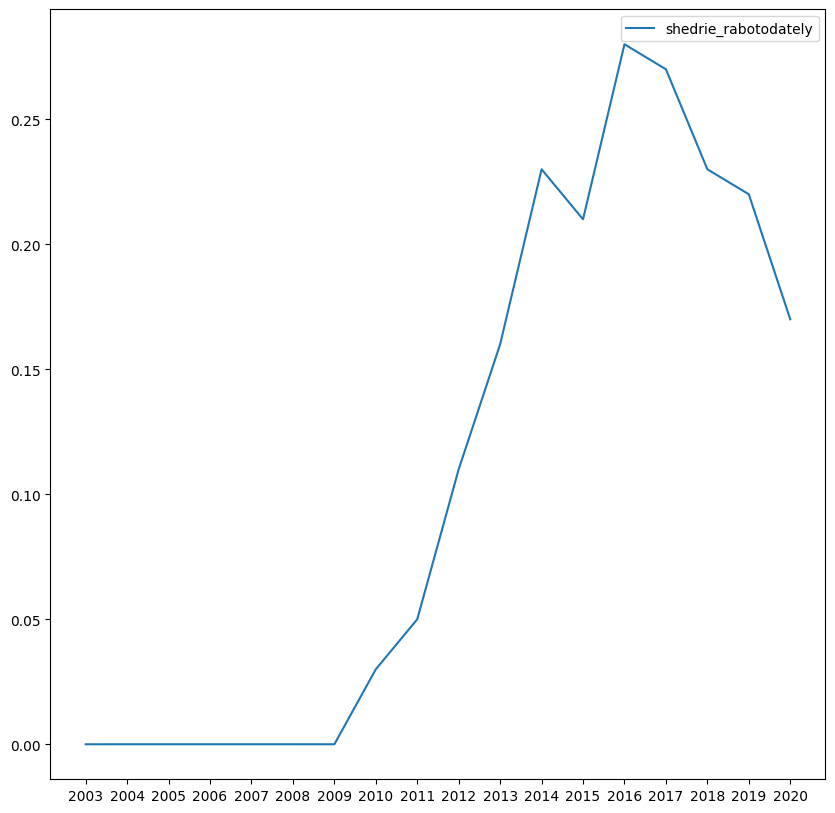

In [ ]:
visualize_lineplot(num_percent_pechenki)